# Final Project 2

Nama Anggota Kelompok :
1. Dwi Ratna
2. Rara Dita Purnama Reta
3. Muhammad Daffa Izzuddin
4. Nur Khofifah

## **Latar Belakang**

Prediksi hujan yang akurat merupakan salah satu tugas yang paling menantang dan penting di dunia saat ini, tidak terkecuali Australia karena memiliki iklim yang beragam. Hal yang membuat menantang dikarenakan hujan bersifat dinamis dari fenomena iklim dan fluktuasi acak yang terlibat dalam proses fisik. Biasanya prediksi hujan dibuat untuk beberapa periode waktu yang meliputi mingguan, bulanan dan prediksi musiman. Prediksi hujan yang tepat dan akurat sangat penting untuk perencanaan dan pengelolaan sumber daya air, peringatan banjir, kegiatan konstruksi dan operasi penerbangan serta yang lainnya. Agar hasil prediksi hujan menjadi optimal, berbagai kompleksitas perlu ditangani, seperti data statistik cuaca yang memiliki banyak fitur diantaranya suhu, kelembaban, tekanan udara, kecepatan angin, dan sebagainya. 

## **Dataset**

Dataset yang digunakan adalah data rain in Australia yang berasal dari kaggle (https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). 

Dataset ini berisi histori cuaca harian selama 10 tahun dari berbagai lokasi di Australia yang terdiri dari 145460 baris dan 23 atribut.
Atribut yang menjadi variabel target adalah RainTomorrow yang berisi "No" (tidak terjadi hujan besok) dan "Yes" (terjadi hujan besok 1mm atau lebih).

## **Objective yang ingin dicapai**

Objective yang ingin dicapai dalam analisis ini yaitu:

- Dapat mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi turunnya hujan

- Dapat memprediksi hujan  berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode Regresi Logistik dan SVM


## **Import Libraries**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

print('Librari sudah siap')

Librari sudah siap


## **Data Loading**

Melakukan proses data loading menggunakan library Pandas

In [2]:
df = pd.read_csv("/Users/ASUS/Hacktiv8/data/Final_Project/weatherAUS.csv")

Melihat 5 baris teratas dataset

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Melihat 5 baris terakhir dataset

In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Melihat informasi kolom, baris, dan tipe data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dataset memiliki tipe data yang bervariasi yakni float, integer (numerik) dan object (kategorik). Selain itu juga terdapat missing value pada dataset karena banyaknya nilai non-null pada beberapa atribut tidak sesuai dengan banyaknya data entri.

Mengelompokan atribut bertipe kategorik dan numerik

In [6]:
# Variabel bertipe kategorik
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]
print('categorical:', categorical, '\n', 'numerical: ', numerical)

categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 
 numerical:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Melihat jumlah baris dan kolom dataset

In [7]:
df.shape

(145460, 23)

Dataset memiliki 145460 baris dan 23 kolom

Melihat semua kolom dari dataset

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Melihat unique values pada setiap atribut

In [9]:
for col in df.columns:
    print(col,': ', df[col].nunique())

Date :  3436
Location :  49
MinTemp :  389
MaxTemp :  505
Rainfall :  681
Evaporation :  358
Sunshine :  145
WindGustDir :  16
WindGustSpeed :  67
WindDir9am :  16
WindDir3pm :  16
WindSpeed9am :  43
WindSpeed3pm :  44
Humidity9am :  101
Humidity3pm :  101
Pressure9am :  546
Pressure3pm :  549
Cloud9am :  10
Cloud3pm :  10
Temp9am :  441
Temp3pm :  502
RainToday :  2
RainTomorrow :  2


mengitung jumlah kemunculan setiap unique value pada RainTomorrow

In [10]:
print(df['RainTomorrow'].value_counts())

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


Mengecek missing value dan jumlahnya

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Melihat persentase missing value

In [12]:
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

Date               0.0 %
Location           0.0 %
MaxTemp           0.87 %
MinTemp           1.02 %
Temp9am           1.21 %
WindSpeed9am      1.21 %
Humidity9am       1.82 %
Pressure3pm      10.33 %
Pressure9am      10.36 %
WindSpeed3pm      2.11 %
Rainfall          2.24 %
RainToday         2.24 %
RainTomorrow      2.25 %
Temp3pm           2.48 %
WindDir3pm        2.91 %
Humidity3pm        3.1 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustSpeed     7.06 %
WindGustDir        7.1 %
WindDir9am        7.26 %
dtype: object

Terlihat bahwa terdapat 21 atribut yang mempunyai missing value. Untuk itu perlu dilakukan penanganan pada tahap selanjutnya.

Melihat missing value pada atribut bertipe numerik

In [13]:
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

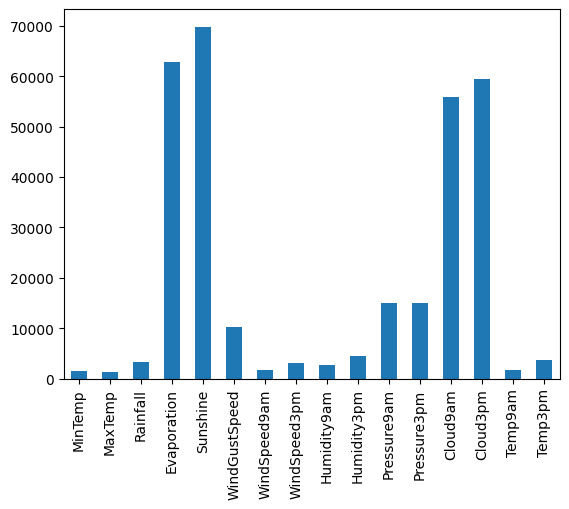

In [14]:
df[numerical].isnull().sum().plot.bar()
plt.show()

Terlihat bahwa missing value pada atribut **Sunshine** mencapai 48%, sedangkan pada atribut **Evaporation**, **Cloud9am** dan **Cloud3pm** mengandung missing value dikisaran 40%

Melihat missing value pada atribut bertipe kategorik

In [15]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

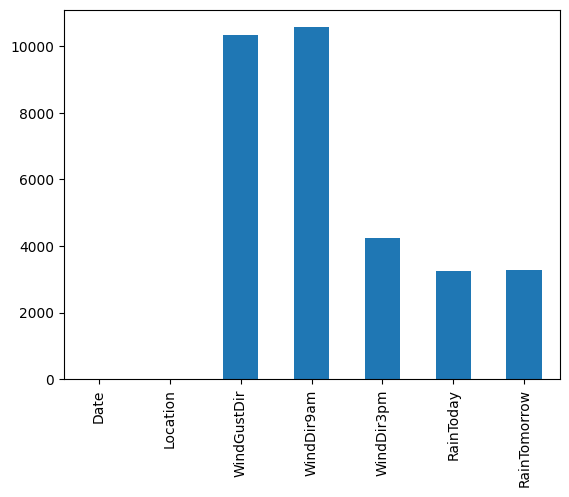

In [16]:
df[categorical].isnull().sum().plot.bar()
plt.show()

Terlihat bahwa missing value pada atribut bertipe kategorik tidak terlalu tinggi, yaitu sekitar 7% pada atribut **WindDir9am** dan **WindGustDir**.

Melihat distribusi pada atribut numerik

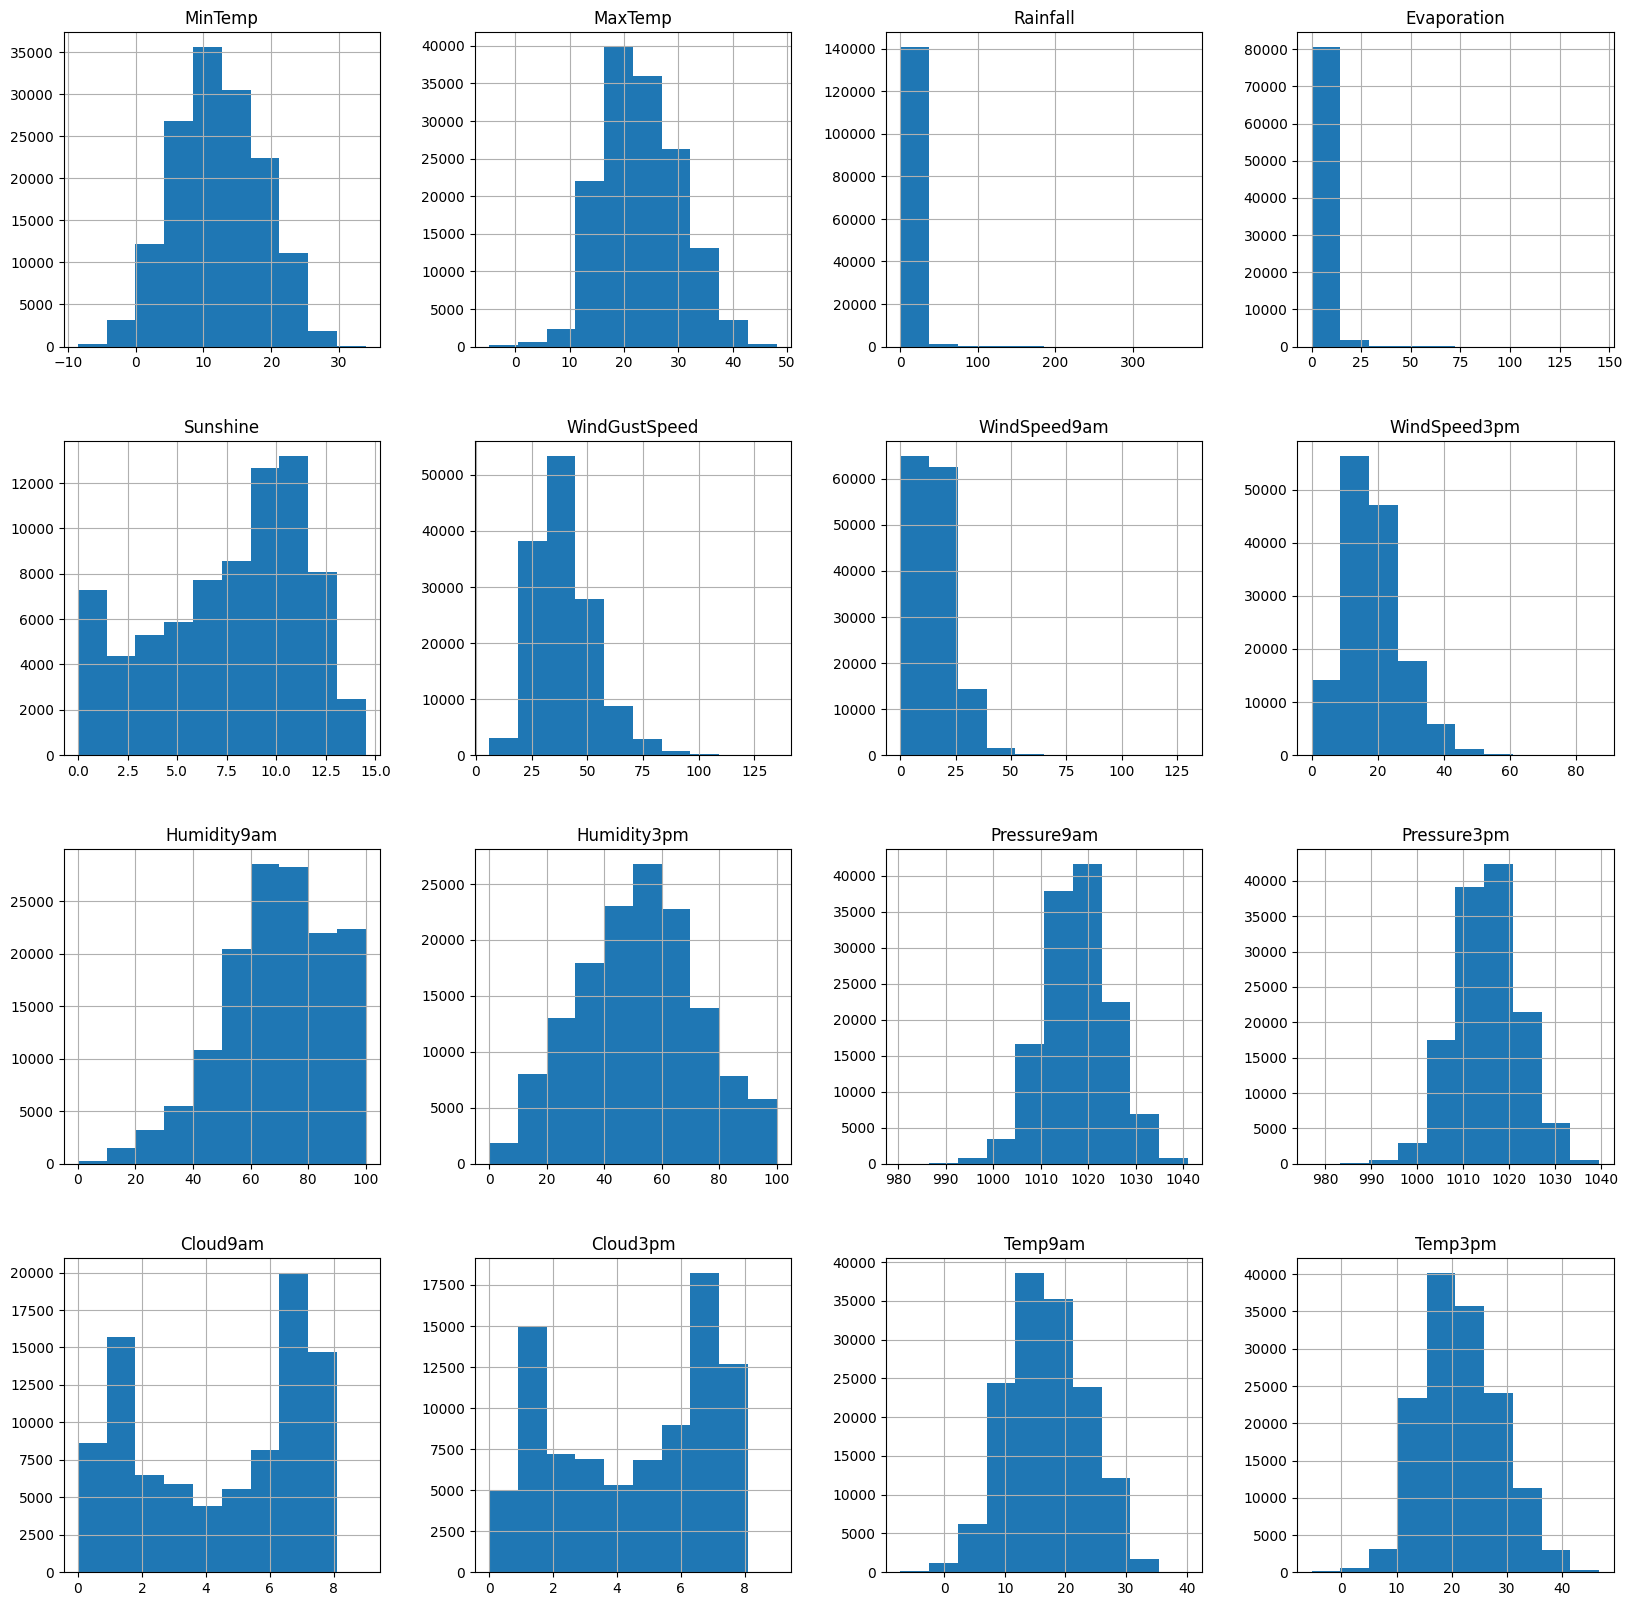

In [17]:
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

Berdasarkan histogram terlihat bahwa beberapa atribut berdistribusi normal, seperti **Humidity3pm**, **MinTemp**, **Temp9am**, sedangkan beberapa atribut memiliki skewness yang tinggi, yaitu atribut **Evaporation** dan **Rainfall**.

Melihat statistik deskriptif dari atribut bertipe numerik

In [18]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Melihat statistik deskriptif dari atribut bertipe object

In [19]:
df[categorical].describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


## **Data Cleaning**

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut.

#### Pengecekan kolom

Memecah atribut Date menjadi atribut baru

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [21]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


Menghapus atribut **Date** karena sudah diganti dengan atribut **Day**, **Month**, **Year**.

In [22]:
df.drop('Date', axis = 1, inplace = True)

Memperbarui list atribut bertipe kategorik

In [23]:
categorical = [i for i in df.columns if i not in numerical]
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow',
 'Day',
 'Month',
 'Year']

#### Mengecek duplikasi data

In [24]:
df.duplicated().sum()

0

Terlihat bahwa tidak terdapat duplikasi data.

#### Menangani Outlier

Mengecek statistik deskriptif dari data bertipe numerik

In [25]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Terlihat bahwa atribut memiliki rentang yang berbeda-beda

**Mengecek boxplot pada atribut numerik**

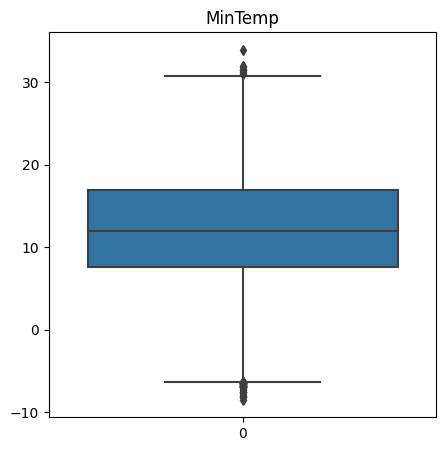

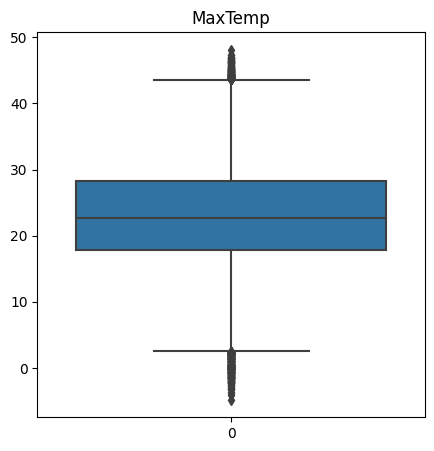

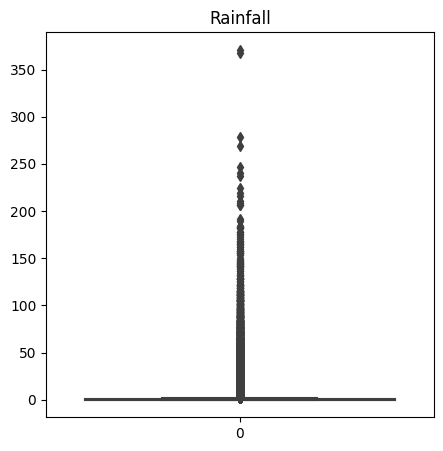

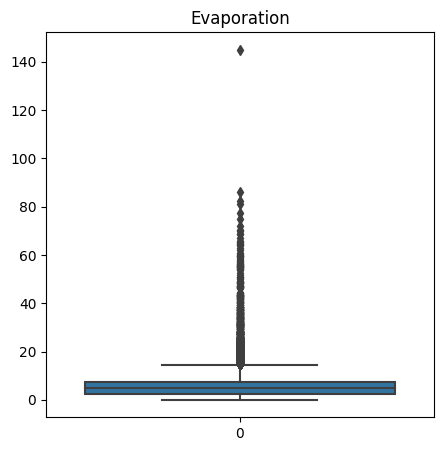

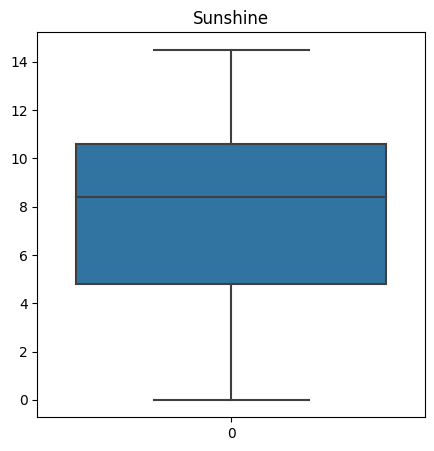

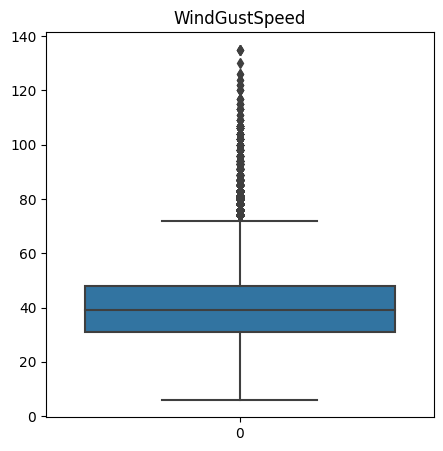

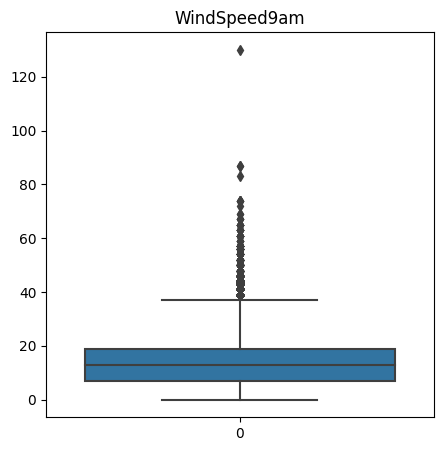

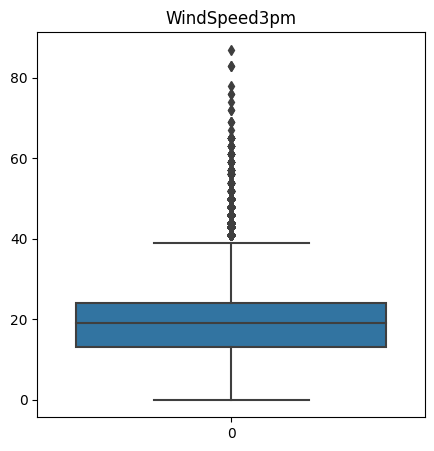

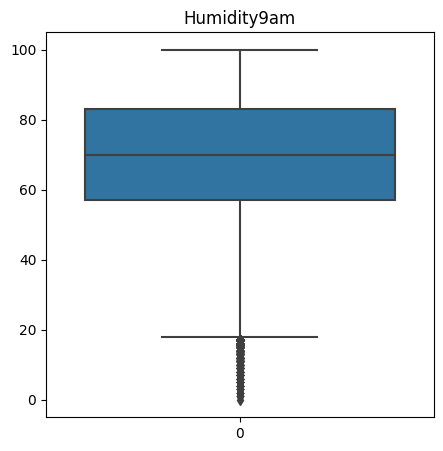

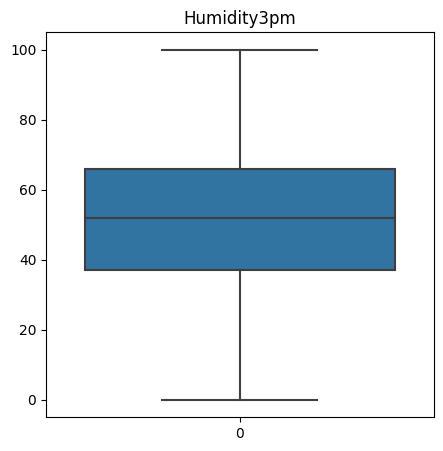

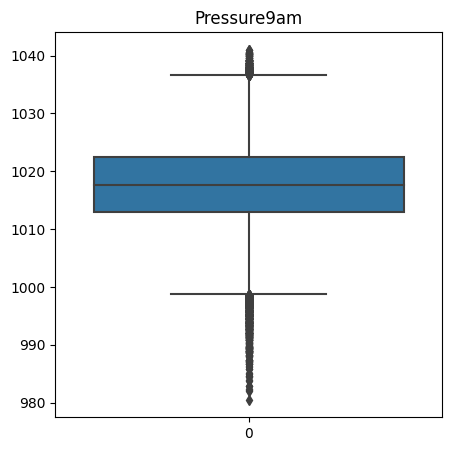

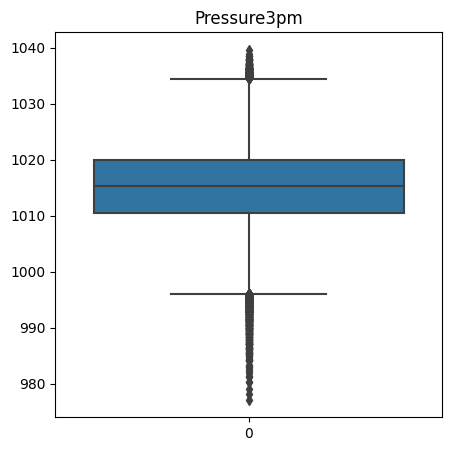

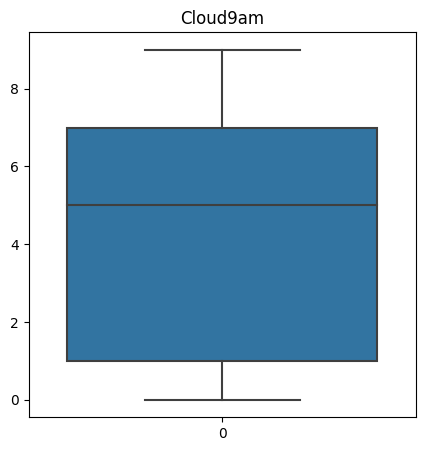

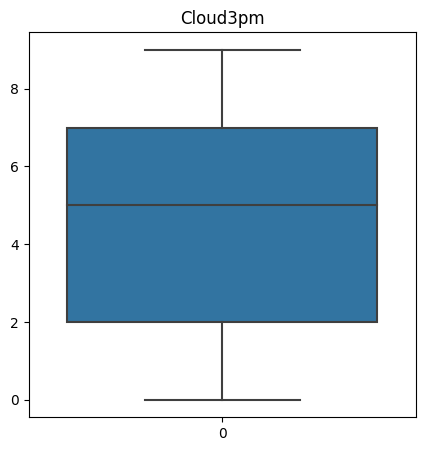

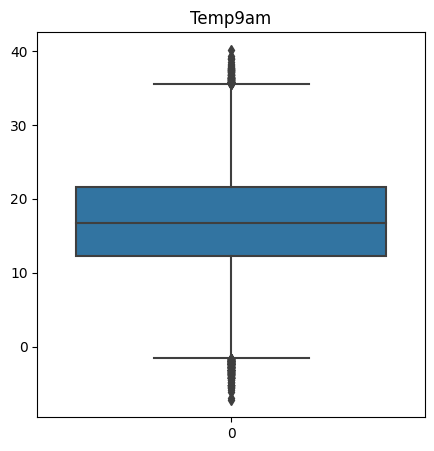

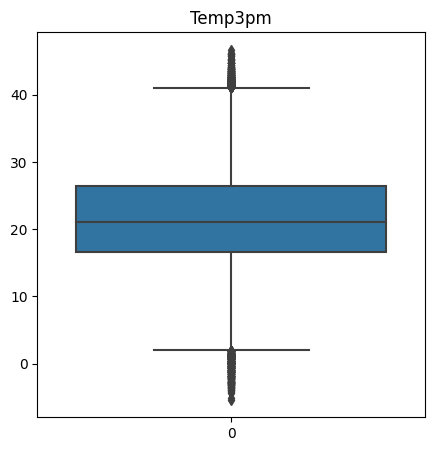

In [26]:
for feature in numerical:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)

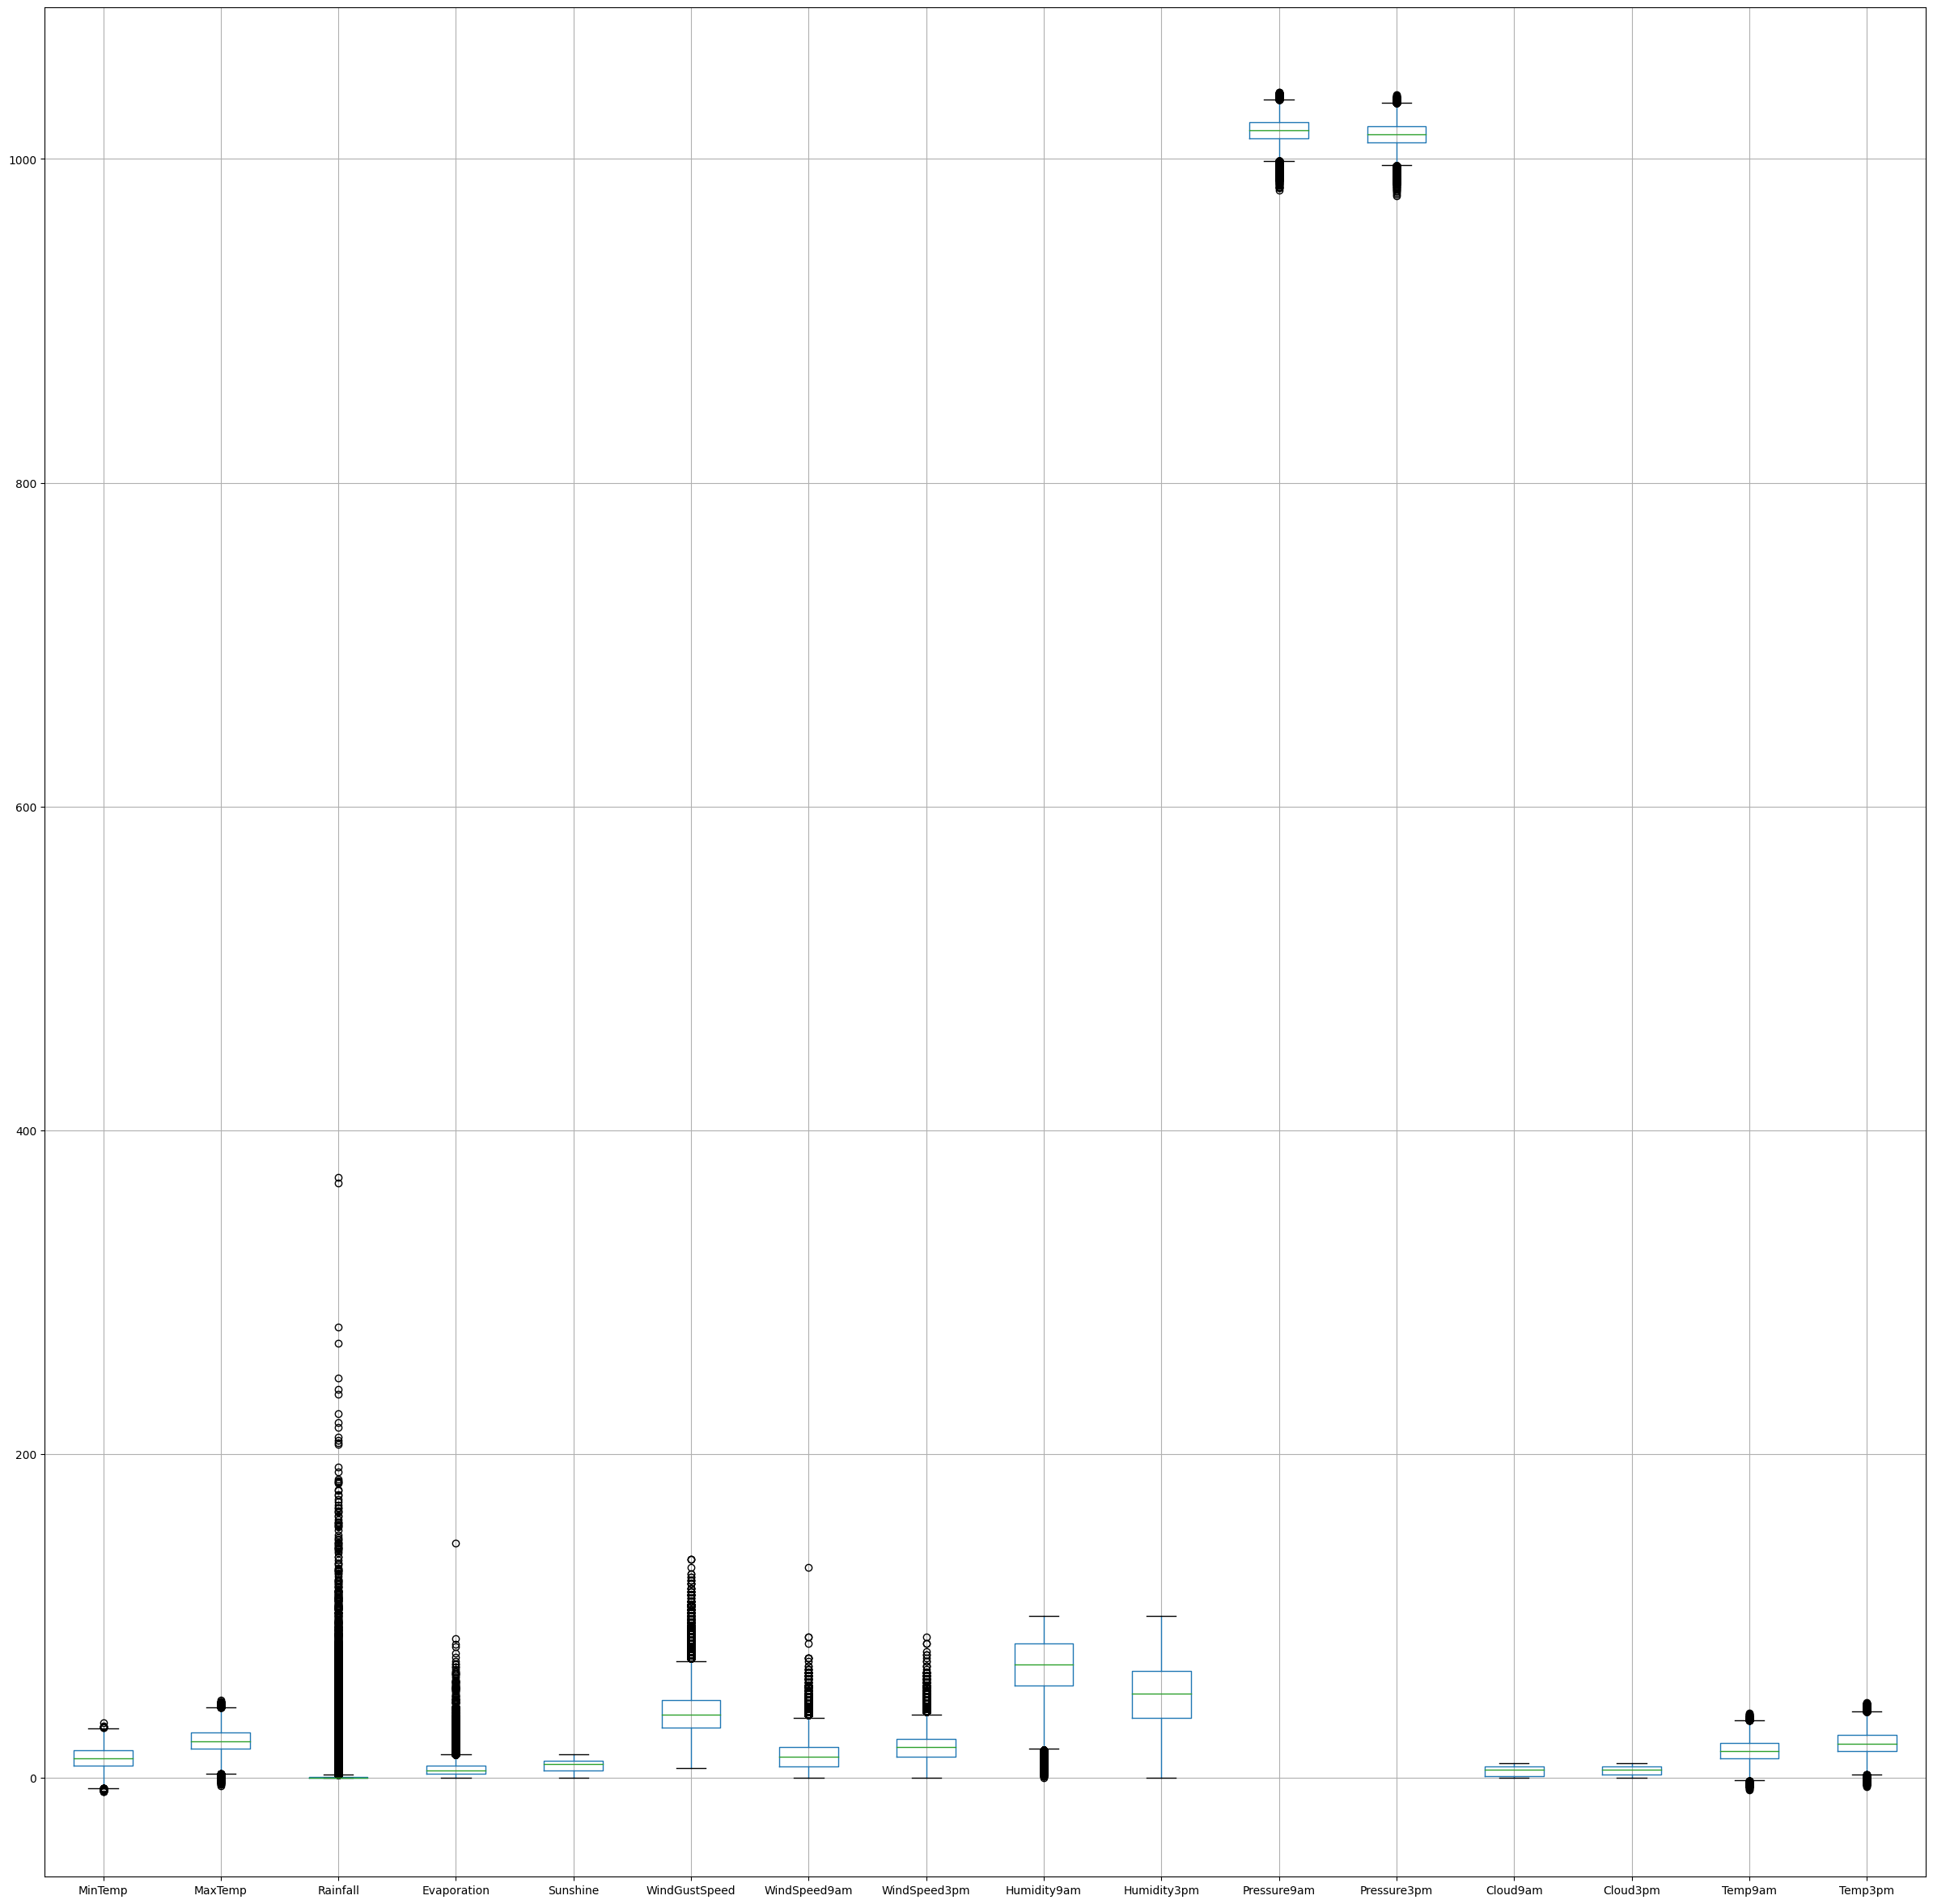

In [27]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

Boxplot menunjukkan outlier dalam jumlah banyak pada atribut **MinTemp**, **MaxTemp**, **Rainfall**, **Evaporation**, **WindGustSpeed**, **WindSpeed9am**, **WindSpeed3pm**, **Humidity9am**, **Pressure9am**, **Pressure3pm**, **Temp9am**, dan **Temp3pm**.

In [28]:
outlier = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']
print('outlier :',outlier)

outlier : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


Mengatasi outlier dengan IQR

In [29]:
for feature in outlier:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

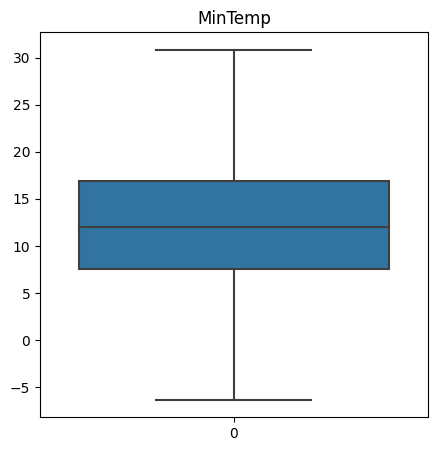

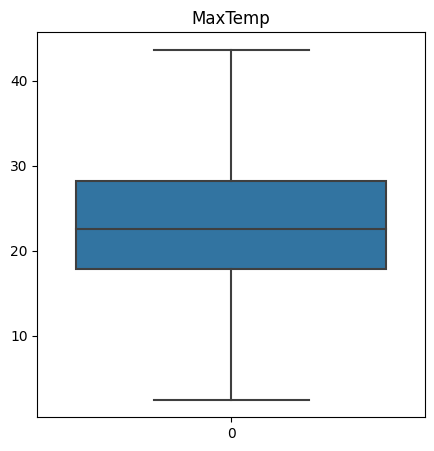

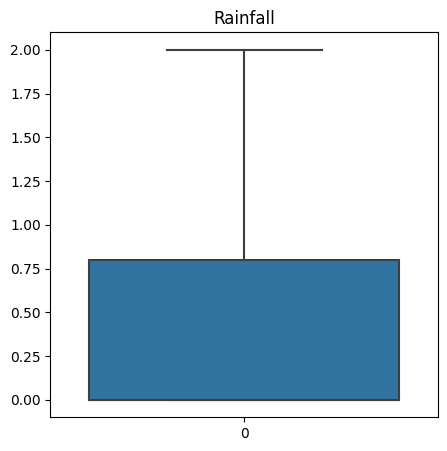

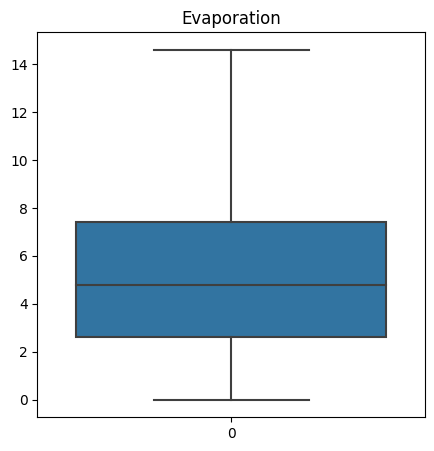

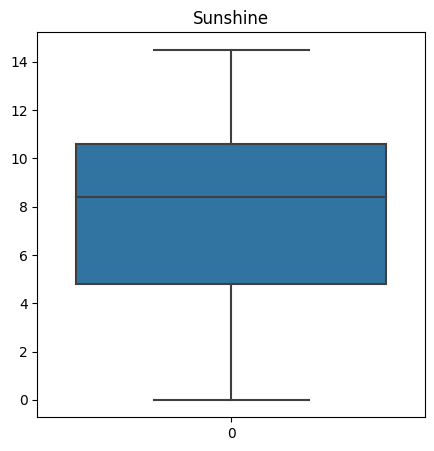

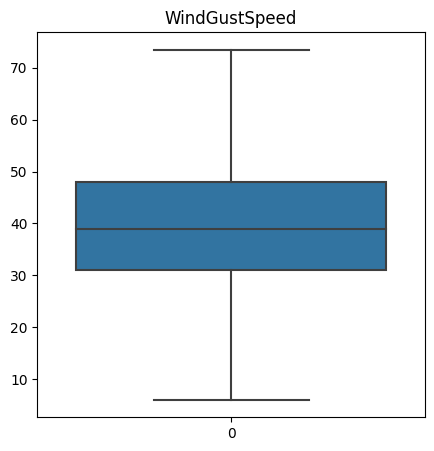

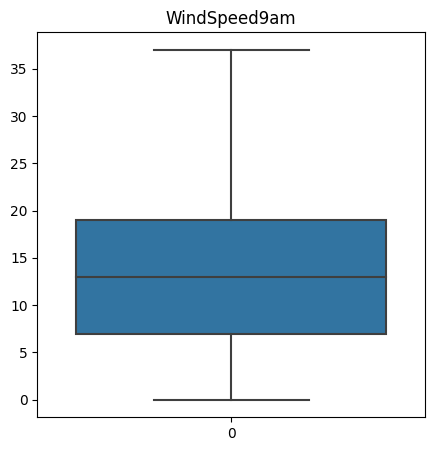

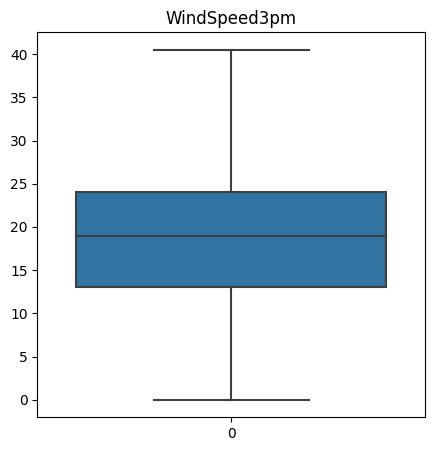

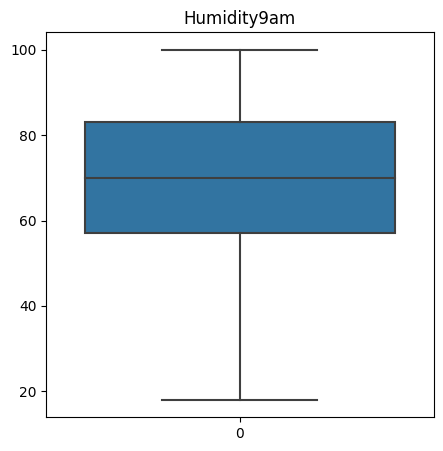

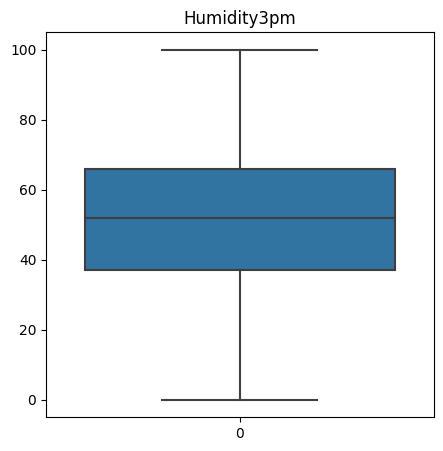

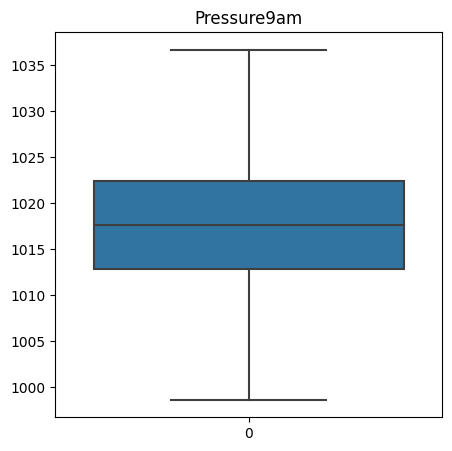

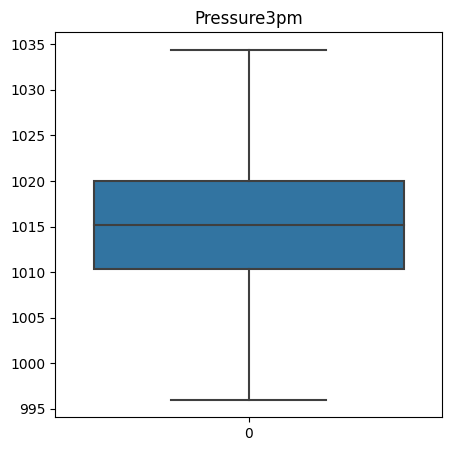

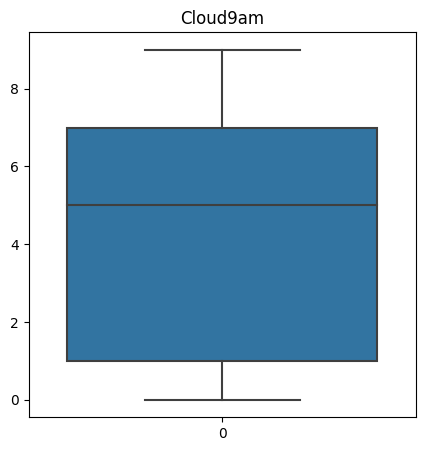

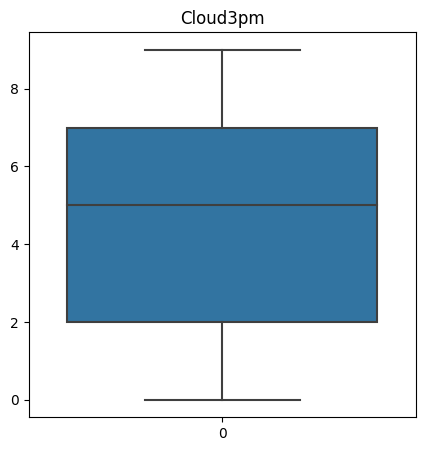

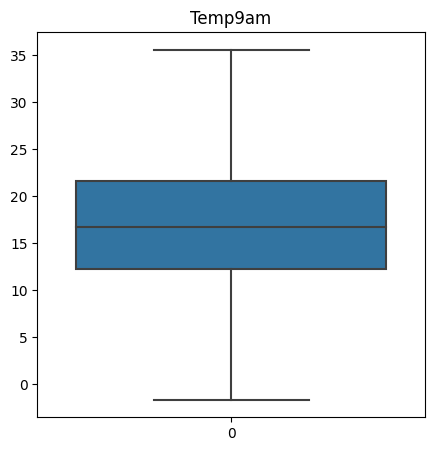

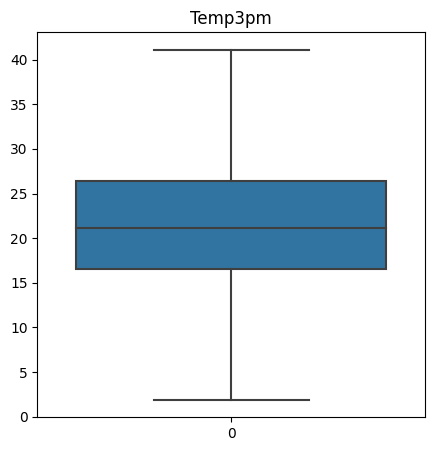

In [30]:
for feature in numerical:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)

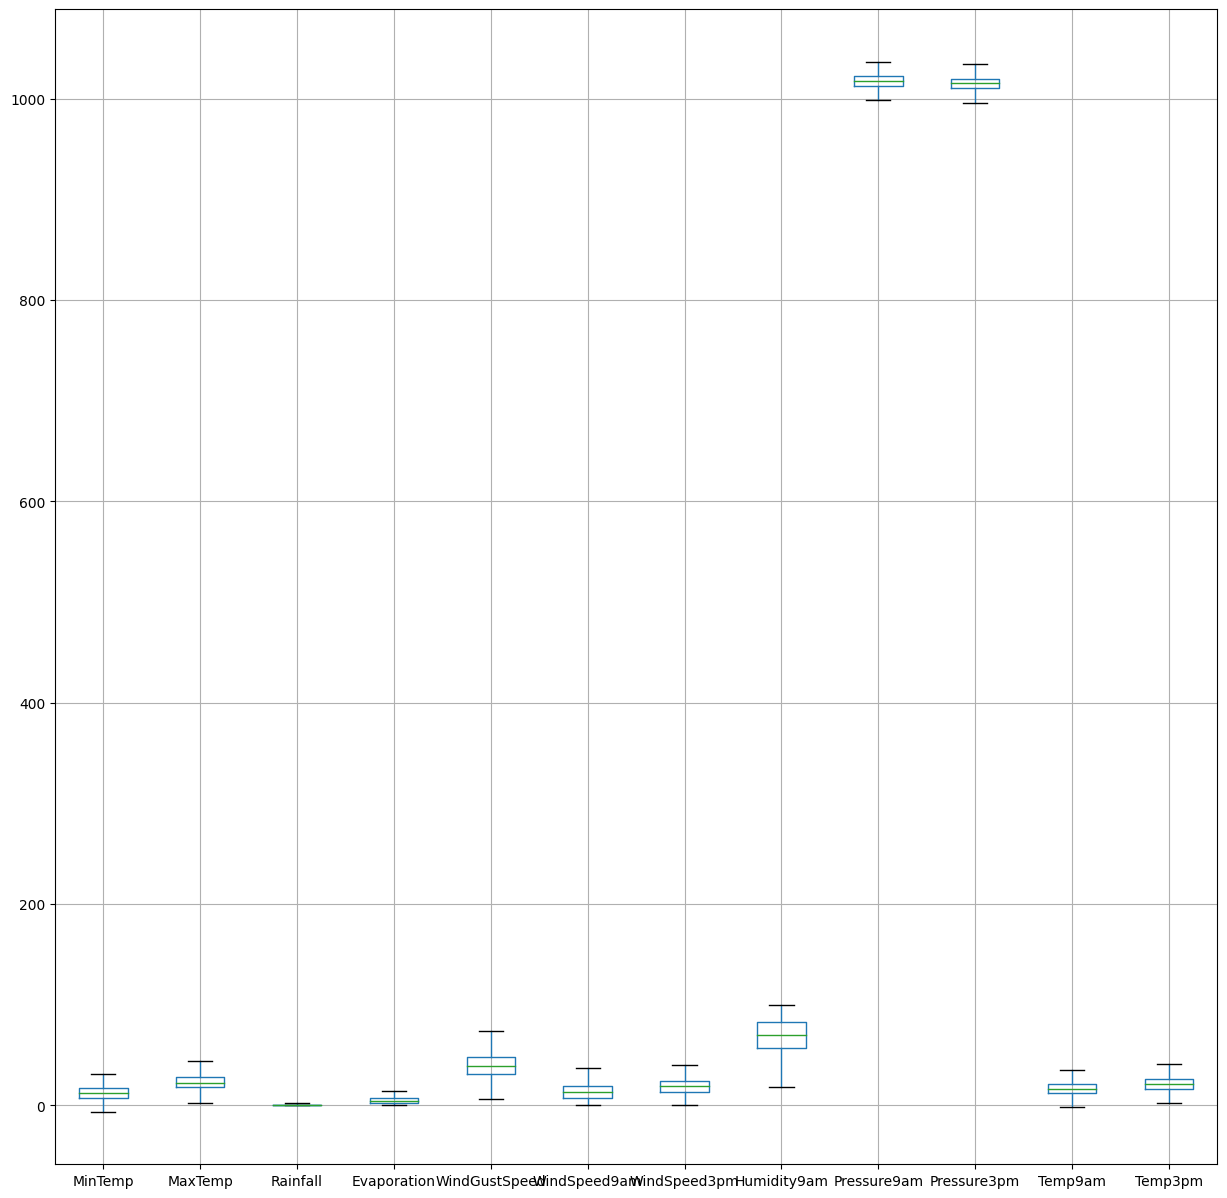

In [31]:
df[outlier].boxplot(figsize = (15,15))
plt.show()

Mengecek ulang statistik deskriptif

In [32]:
df[outlier].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,135197.000000,143693.000000,142398.000000,142806.000000,130395.000000,130432.000000,143693.000000,141851.000000
mean,12.194186,23.224781,0.487224,5.318667,39.837792,13.951313,18.574162,68.933567,1017.670297,1015.269781,16.991728,21.686191
std,6.397741,7.100632,0.792809,3.418079,12.981866,8.607783,8.532467,18.876608,7.025447,6.976954,6.481325,6.909048
min,-6.350000,2.450000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,998.650000,996.000000,-1.650000,1.900000
25%,7.600000,17.900000,0.000000,2.600000,31.000000,7.000000,13.000000,57.000000,1012.900000,1010.400000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,39.000000,13.000000,19.000000,70.000000,1017.600000,1015.200000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,48.000000,19.000000,24.000000,83.000000,1022.400000,1020.000000,21.600000,26.400000
max,30.850000,43.650000,2.000000,14.600000,73.500000,37.000000,40.500000,100.000000,1036.650000,1034.400000,35.550000,41.100000


#### Melakukan penanganan terhadap missing value

Menghapus baris yang merupakan missing value pada atribut target (RainTomorrow)

In [33]:
df2 = df.drop(df[df['RainTomorrow'].isnull()].index)

In [34]:
df.shape, df2.shape

((145460, 25), (142193, 25))

Menghapus kolom dengan missing value >11%

In [35]:
missing_value = df2.apply(lambda x: f'{((x.isnull().sum()/df2.shape[0])*100).round(2)} %').sort_values(ascending=True)
missing_value

Location           0.0 %
Day                0.0 %
RainTomorrow       0.0 %
Month              0.0 %
Year               0.0 %
MaxTemp           0.23 %
MinTemp           0.45 %
Temp9am           0.64 %
WindSpeed9am      0.95 %
RainToday         0.99 %
Rainfall          0.99 %
Humidity9am       1.25 %
WindSpeed3pm      1.85 %
Temp3pm           1.92 %
Humidity3pm       2.54 %
WindDir3pm        2.66 %
Cloud9am         37.74 %
Cloud3pm         40.15 %
Evaporation      42.79 %
Sunshine         47.69 %
WindGustSpeed     6.52 %
WindGustDir       6.56 %
WindDir9am        7.04 %
Pressure3pm       9.83 %
Pressure9am       9.86 %
dtype: object

In [36]:
df3 = df2.drop(['Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine'], axis=1) 

In [37]:
print('banyak kolom :', len(df3.columns))
print('kolom :', df3.columns)

banyak kolom : 21
kolom : Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Day',
       'Month', 'Year'],
      dtype='object')


Mengisi baris yang merupakan missing value 

- Atribut bertipe numeric yang terdapat missing value akan ditangani dengan imputasi median
- Atribut bertipe object yang terdapat missing value akan ditangani dengan imputasi modus

Memperbarui list atribut bertipe numerik

In [38]:
#update numerical
numerical = [i for i in df3.columns if i not in categorical] 
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [39]:
for num_col in numerical:
    df3[num_col].fillna(df3[num_col].median(),inplace=True)

In [40]:
df3[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [41]:
for cat_col in categorical:
    df3[cat_col].fillna(df3[cat_col].mode()[0],inplace=True)

In [42]:
df3.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  object 
 17  RainTomorrow   142193 non-nul

Dataset sudah tidak terdapat missing value

#### Mengganti nama atribut

In [44]:
df3 = df3.rename(columns={
    'Location':'Lokasi',
    'MinTemp': 'Suhu_Minimum',
    'MaxTemp': 'Suhu_Maksimum',
    'Rainfall':'Curah_Hujan',
    'WindGustDir':'Arah_Angin',
    'WindGustSpeed':'Kecepatan_Angin',
    'WindDir9am':'Arah_Angin_9Pagi',
    'WindDir3pm':'Arah_Angin_3Sore',
    'WindSpeed9am':'Kecepatan_Angin_9Pagi',
    'WindSpeed3pm':'Kecepatan_Angin_3Sore',
    'Humidity9am':'Kelembaban_9Pagi',
    'Humidity3pm':'Kelembaban_3Sore',
    'Pressure9am':'Tekanan_Udara_9Pagi',
    'Pressure3pm':'Tekanan_Udara_3Sore',
    'Temp9am':'Suhu_9Pagi',
    'Temp3pm':'Suhu_3Sore',
    'RainToday':'Hari_ini_Hujan',
    'RainTomorrow':'Hari_besok_Hujan',
    'Day':'Hari',
    'Month':'Bulan',
    'Year':'Tahun'})

In [45]:
df3.head()

,Lokasi,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Arah_Angin,Kecepatan_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,...,Kelembaban_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari_ini_Hujan,Hari_besok_Hujan,Hari,Bulan,Tahun
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008


## Exploratory Data Analysis

### Descriptive Statistics & Query

Melihat statistik deskriptif pada data numerik

In [46]:
df3.describe()

,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Kecepatan_Angin,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembaban_9Pagi,Kelembaban_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari,Bulan,Tahun
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185713,23.228521,0.480920,39.737758,13.903378,18.557721,68.911015,51.495742,1017.666961,1015.265107,16.986635,21.678505,15.715084,6.402544,2012.758926
std,6.388185,7.092048,0.789391,12.541558,8.551453,8.447273,18.779092,20.532227,6.668663,6.623914,6.465222,6.844631,8.798150,3.426506,2.541256
min,-6.350000,2.450000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,-1.650000,1.900000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,30.850000,43.650000,2.000000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,35.550000,41.100000,31.000000,12.000000,2017.000000


Diperoleh bahwa:
- curah hujan rata-rata 0.48 
- kecepatan angin rata-rata berada pada 39.73
- suhu terendah pada suhu minimum mencapai -6.35 derajat
- suhu tertinggi pada suhu maksimum mencapai 43.65 derajat

Melihat statistik deskritif pada data kategorik

In [47]:
df3.describe(include="O")

,Lokasi,Arah_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Hari_ini_Hujan,Hari_besok_Hujan
count,142193,142193,142193,142193,142193,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3418,19110,21406,14441,110738,110316


Diperoleh bahwa:
- Terdapat 49 lokasi dengan lokasi paling banyak terletak di Canberra 
- Tidak hujan (No) lebih dominan pada atribut Hari_ini_Hujan dan Hari_besok_Hujan
- Arah angin paling sering adalah W
- Arah angin 9pagi paling sering adalah N
- Arah angin 3sore paling sering adalah SE

Melihat persebaran data pada atribut **Hari_ini_Hujan** dan atribut target **Hari_besok_Hujan**

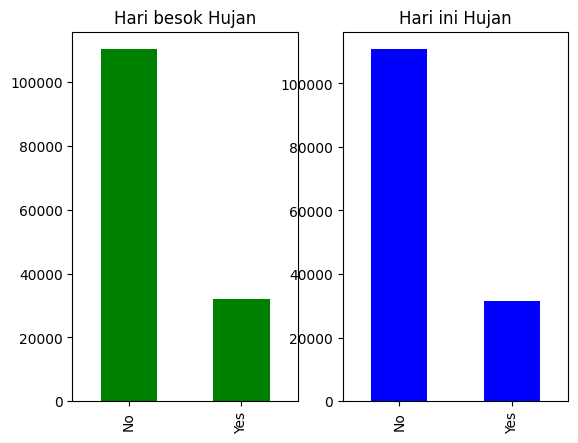

In [48]:
%matplotlib inline
plt.subplot(1,2,1)
df3['Hari_besok_Hujan'].value_counts().plot.bar(color='g')
plt.title('Hari besok Hujan')

plt.subplot(1,2,2)
df3['Hari_ini_Hujan'].value_counts().plot.bar(color='b')
plt.title('Hari ini Hujan')
plt.show()

Terlihat kedua histogram menunjukkan proporsi yang sama. Pada atribut target **Hari_besok_Hujan**, terdapat perbedaan yang cukup signifikan antara nilai **No** dan **Yes**

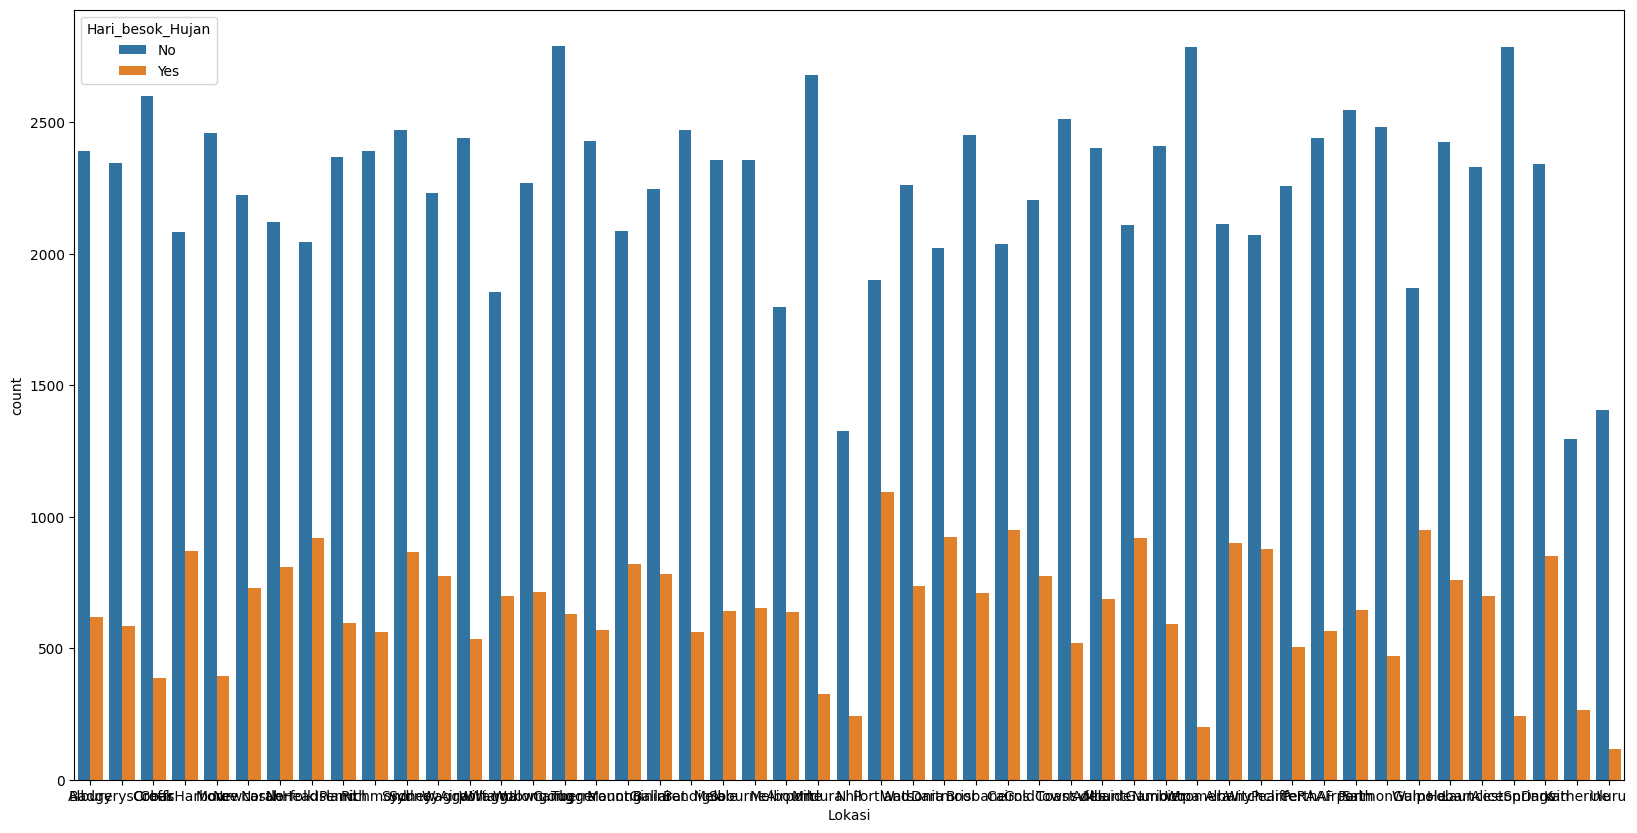

In [49]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Lokasi", hue="Hari_besok_Hujan", data=df3)

Terlihat bahwa Hari_besok_Hujan mempunyai intensitas yang berbeda-beda di setiap lokasi.

### Correlation Matrix

In [50]:
df3.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13228\3136175663.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,Suhu_Minimum,Suhu_Maksimum,Curah_Hujan,Kecepatan_Angin,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembaban_9Pagi,Kelembaban_3Sore,Tekanan_Udara_9Pagi,Tekanan_Udara_3Sore,Suhu_9Pagi,Suhu_3Sore,Hari,Bulan,Tahun
Suhu_Minimum,1.000000,0.733881,0.051348,0.180684,0.179173,0.178355,-0.232455,0.006088,-0.429397,-0.437689,0.898202,0.699112,0.001504,-0.203827,0.039149
Suhu_Maksimum,0.733881,1.000000,-0.255706,0.074268,0.017665,0.053648,-0.499320,-0.499384,-0.315435,-0.402675,0.880422,0.969395,-0.000432,-0.164508,0.058313
Curah_Hujan,0.051348,-0.255706,1.000000,0.150971,0.101401,0.079477,0.387198,0.406165,-0.180202,-0.095612,-0.114112,-0.260234,0.003278,0.012030,-0.015168
Kecepatan_Angin,0.180684,0.074268,0.150971,1.000000,0.580365,0.661141,-0.216309,-0.030471,-0.424848,-0.382464,0.154849,0.040380,-0.009818,0.058319,-0.030303
Kecepatan_Angin_9Pagi,0.179173,0.017665,0.101401,0.580365,1.000000,0.508289,-0.274177,-0.033473,-0.213846,-0.164199,0.132849,0.008257,-0.009278,0.051257,-0.020580
Kecepatan_Angin_3Sore,0.178355,0.053648,0.079477,0.661141,0.508289,1.000000,-0.147360,0.014574,-0.275715,-0.237346,0.166950,0.032190,-0.010389,0.059728,-0.032322
Kelembaban_9Pagi,-0.232455,-0.499320,0.387198,-0.216309,-0.274177,-0.147360,1.000000,0.659848,0.133141,0.177353,-0.470159,-0.491834,0.015578,-0.089200,0.010598
Kelembaban_3Sore,0.006088,-0.499384,0.406165,-0.030471,-0.033473,0.014574,0.659848,1.000000,-0.024427,0.050094,-0.217161,-0.555388,0.013030,-0.018315,-0.008562
Tekanan_Udara_9Pagi,-0.429397,-0.315435,-0.180202,-0.424848,-0.213846,-0.275715,0.133141,-0.024427,1.000000,0.960197,-0.403734,-0.272338,-0.019853,0.035971,0.029658
Tekanan_Udara_3Sore,-0.437689,-0.402675,-0.095612,-0.382464,-0.164199,-0.237346,0.177353,0.050094,0.960197,1.000000,-0.446732,-0.366263,-0.020147,0.026574,0.024746


Melakukan visualisasi korelasi antar variabel untuk melihat hubungan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13228\1686920131.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = sns.heatmap(df3.corr(), linewidths = .5, annot=True, fmt='.2f')


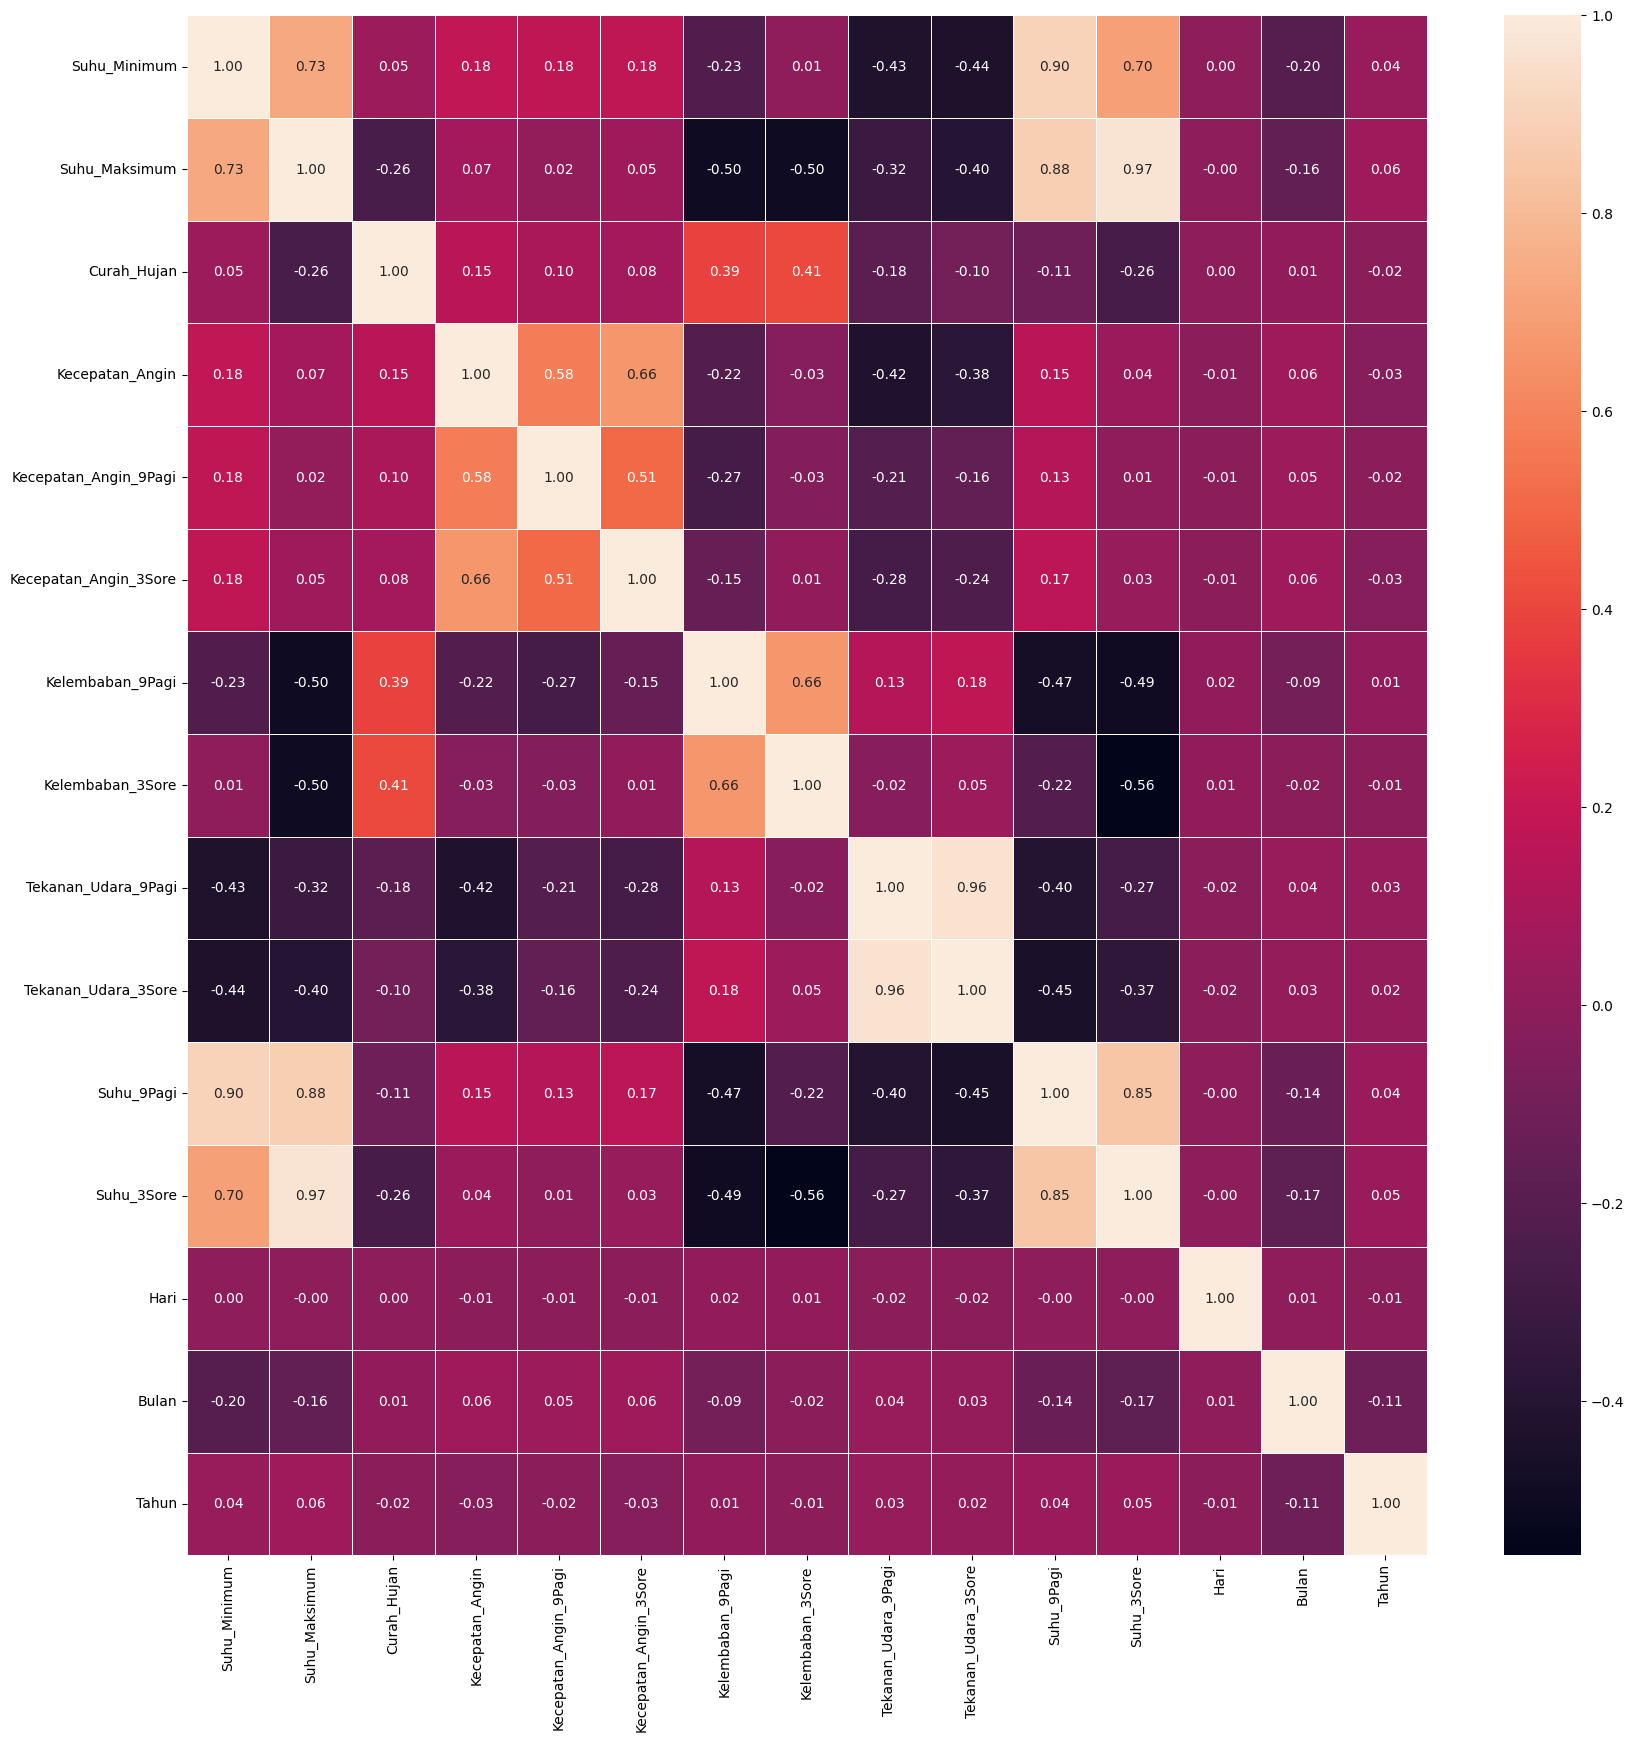

In [51]:
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df3.corr(), linewidths = .5, annot=True, fmt='.2f')

Terlihat bahwa terdapat korelasi yang tinggi (>0,8) diantara atribut **Tekanan_Udara_3Sore** dan **Tekanan_Udara_9Pagi**, , **Suhu_Maksimum** dan **Suhu_3Sore**, **Suhu_Minimum** dan **Suhu_Maksimum**, **Suhu_9Pagi** dan **Suhu_Maksimum**, yang berarti atribut tsb merepresentasikan informasi yang sama. Oleh karena itu, harus dikeluarkan salah satu

In [52]:
df4 = df3.drop(['Tekanan_Udara_3Sore','Suhu_Maksimum','Suhu_9Pagi'],axis = 1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13228\3581257451.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = sns.heatmap(df4.corr(), linewidths = .5, annot=True, fmt='.2f')


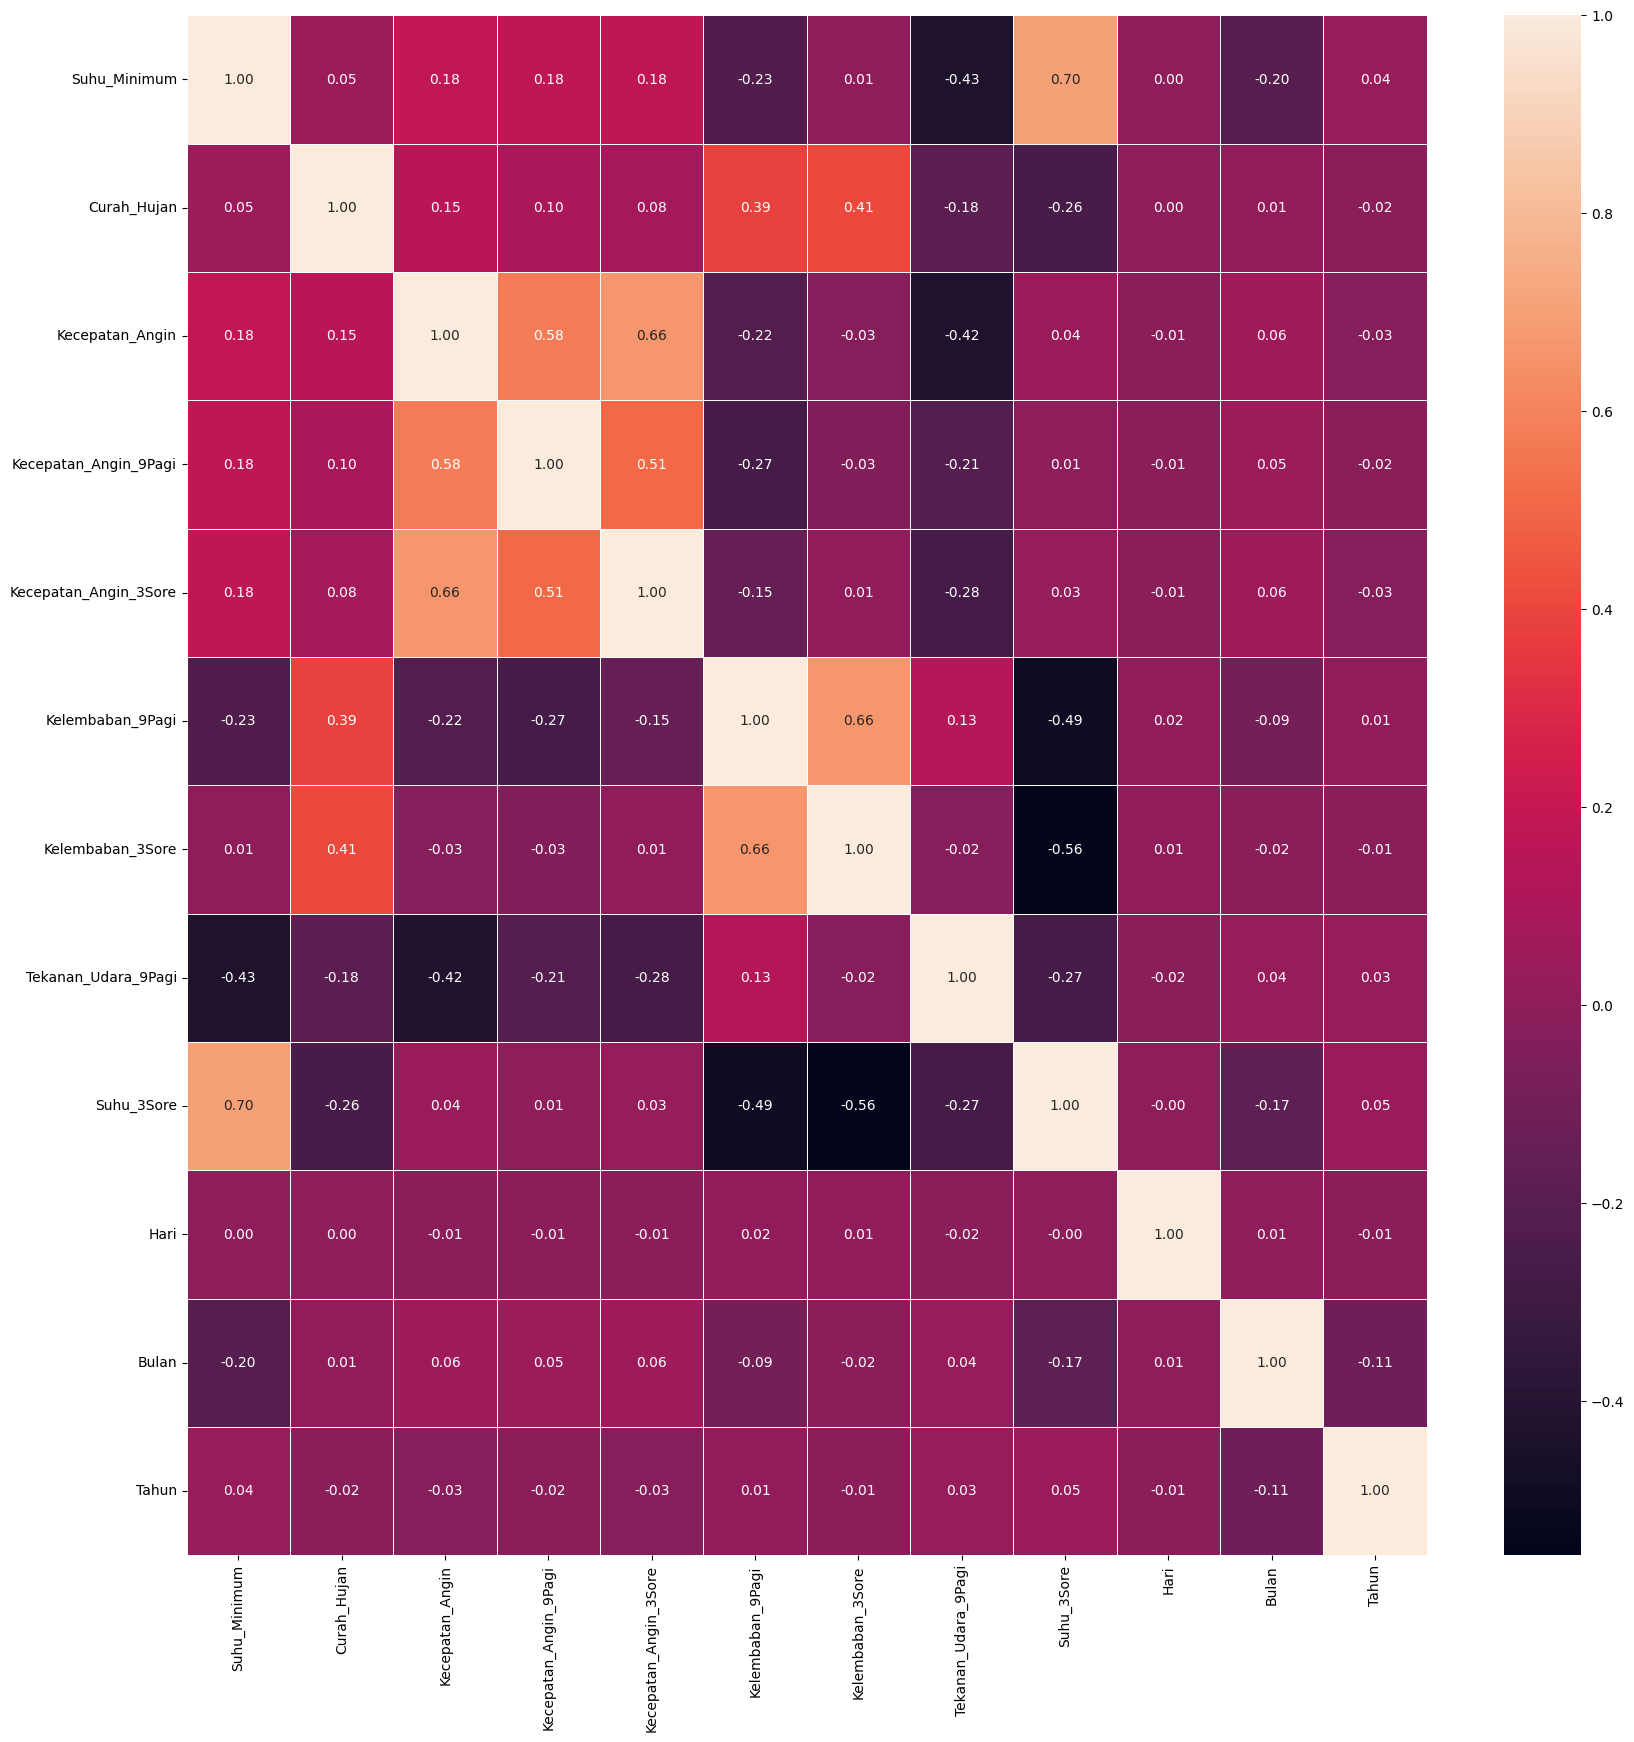

In [53]:
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df4.corr(), linewidths = .5, annot=True, fmt='.2f')

In [54]:
df4.columns

Index(['Lokasi', 'Suhu_Minimum', 'Curah_Hujan', 'Arah_Angin',
       'Kecepatan_Angin', 'Arah_Angin_9Pagi', 'Arah_Angin_3Sore',
       'Kecepatan_Angin_9Pagi', 'Kecepatan_Angin_3Sore', 'Kelembaban_9Pagi',
       'Kelembaban_3Sore', 'Tekanan_Udara_9Pagi', 'Suhu_3Sore',
       'Hari_ini_Hujan', 'Hari_besok_Hujan', 'Hari', 'Bulan', 'Tahun'],
      dtype='object')

## Data Preprocessing

Memperbarui list atribut bertipe numerik dan kategorik

In [55]:
categorical = [i for i in df4.columns if df4[i].dtypes == 'O']
numerical = [i for i in df4.columns if i not in categorical] 
print('categorical :', categorical)
print('numerical :', numerical)

categorical : ['Lokasi', 'Arah_Angin', 'Arah_Angin_9Pagi', 'Arah_Angin_3Sore', 'Hari_ini_Hujan', 'Hari_besok_Hujan']
numerical : ['Suhu_Minimum', 'Curah_Hujan', 'Kecepatan_Angin', 'Kecepatan_Angin_9Pagi', 'Kecepatan_Angin_3Sore', 'Kelembaban_9Pagi', 'Kelembaban_3Sore', 'Tekanan_Udara_9Pagi', 'Suhu_3Sore', 'Hari', 'Bulan', 'Tahun']


### Encode

Encoding atribut kategorik menggunakan replace function pada atribut bertipe Object

In [56]:
df4['Hari_ini_Hujan'].replace({'No':0, 'Yes': 1}, inplace = True)
df4['Hari_besok_Hujan'].replace({'No':0, 'Yes': 1}, inplace = True)

In [57]:
def encode_data(feature_name):
     
    mapping_dict = {}
    unique_values = list(df4[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [58]:
df4['Arah_Angin'].replace(encode_data('Arah_Angin'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [59]:
df4['Arah_Angin_9Pagi'].replace(encode_data('Arah_Angin_9Pagi'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [60]:
df4['Arah_Angin_3Sore'].replace(encode_data('Arah_Angin_3Sore'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [61]:
df4['Lokasi'].replace(encode_data('Lokasi'), inplace = True)

{'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4, 'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9, 'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13, 'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17, 'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22, 'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27, 'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32, 'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37, 'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42, 'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47, 'Uluru': 48}


In [62]:
df4.head()

,Lokasi,Suhu_Minimum,Curah_Hujan,Arah_Angin,Kecepatan_Angin,Arah_Angin_9Pagi,Arah_Angin_3Sore,Kecepatan_Angin_9Pagi,Kecepatan_Angin_3Sore,Kelembaban_9Pagi,Kelembaban_3Sore,Tekanan_Udara_9Pagi,Suhu_3Sore,Hari_ini_Hujan,Hari_besok_Hujan,Hari,Bulan,Tahun
0,0,13.4,0.6,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,21.8,0,0,1,12,2008
1,0,7.4,0.0,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,24.3,0,0,2,12,2008
2,0,12.9,0.0,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,23.2,0,0,3,12,2008
3,0,9.2,0.0,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,26.5,0,0,4,12,2008
4,0,17.5,1.0,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,29.7,0,0,5,12,2008


Mengecek ulang korelasi

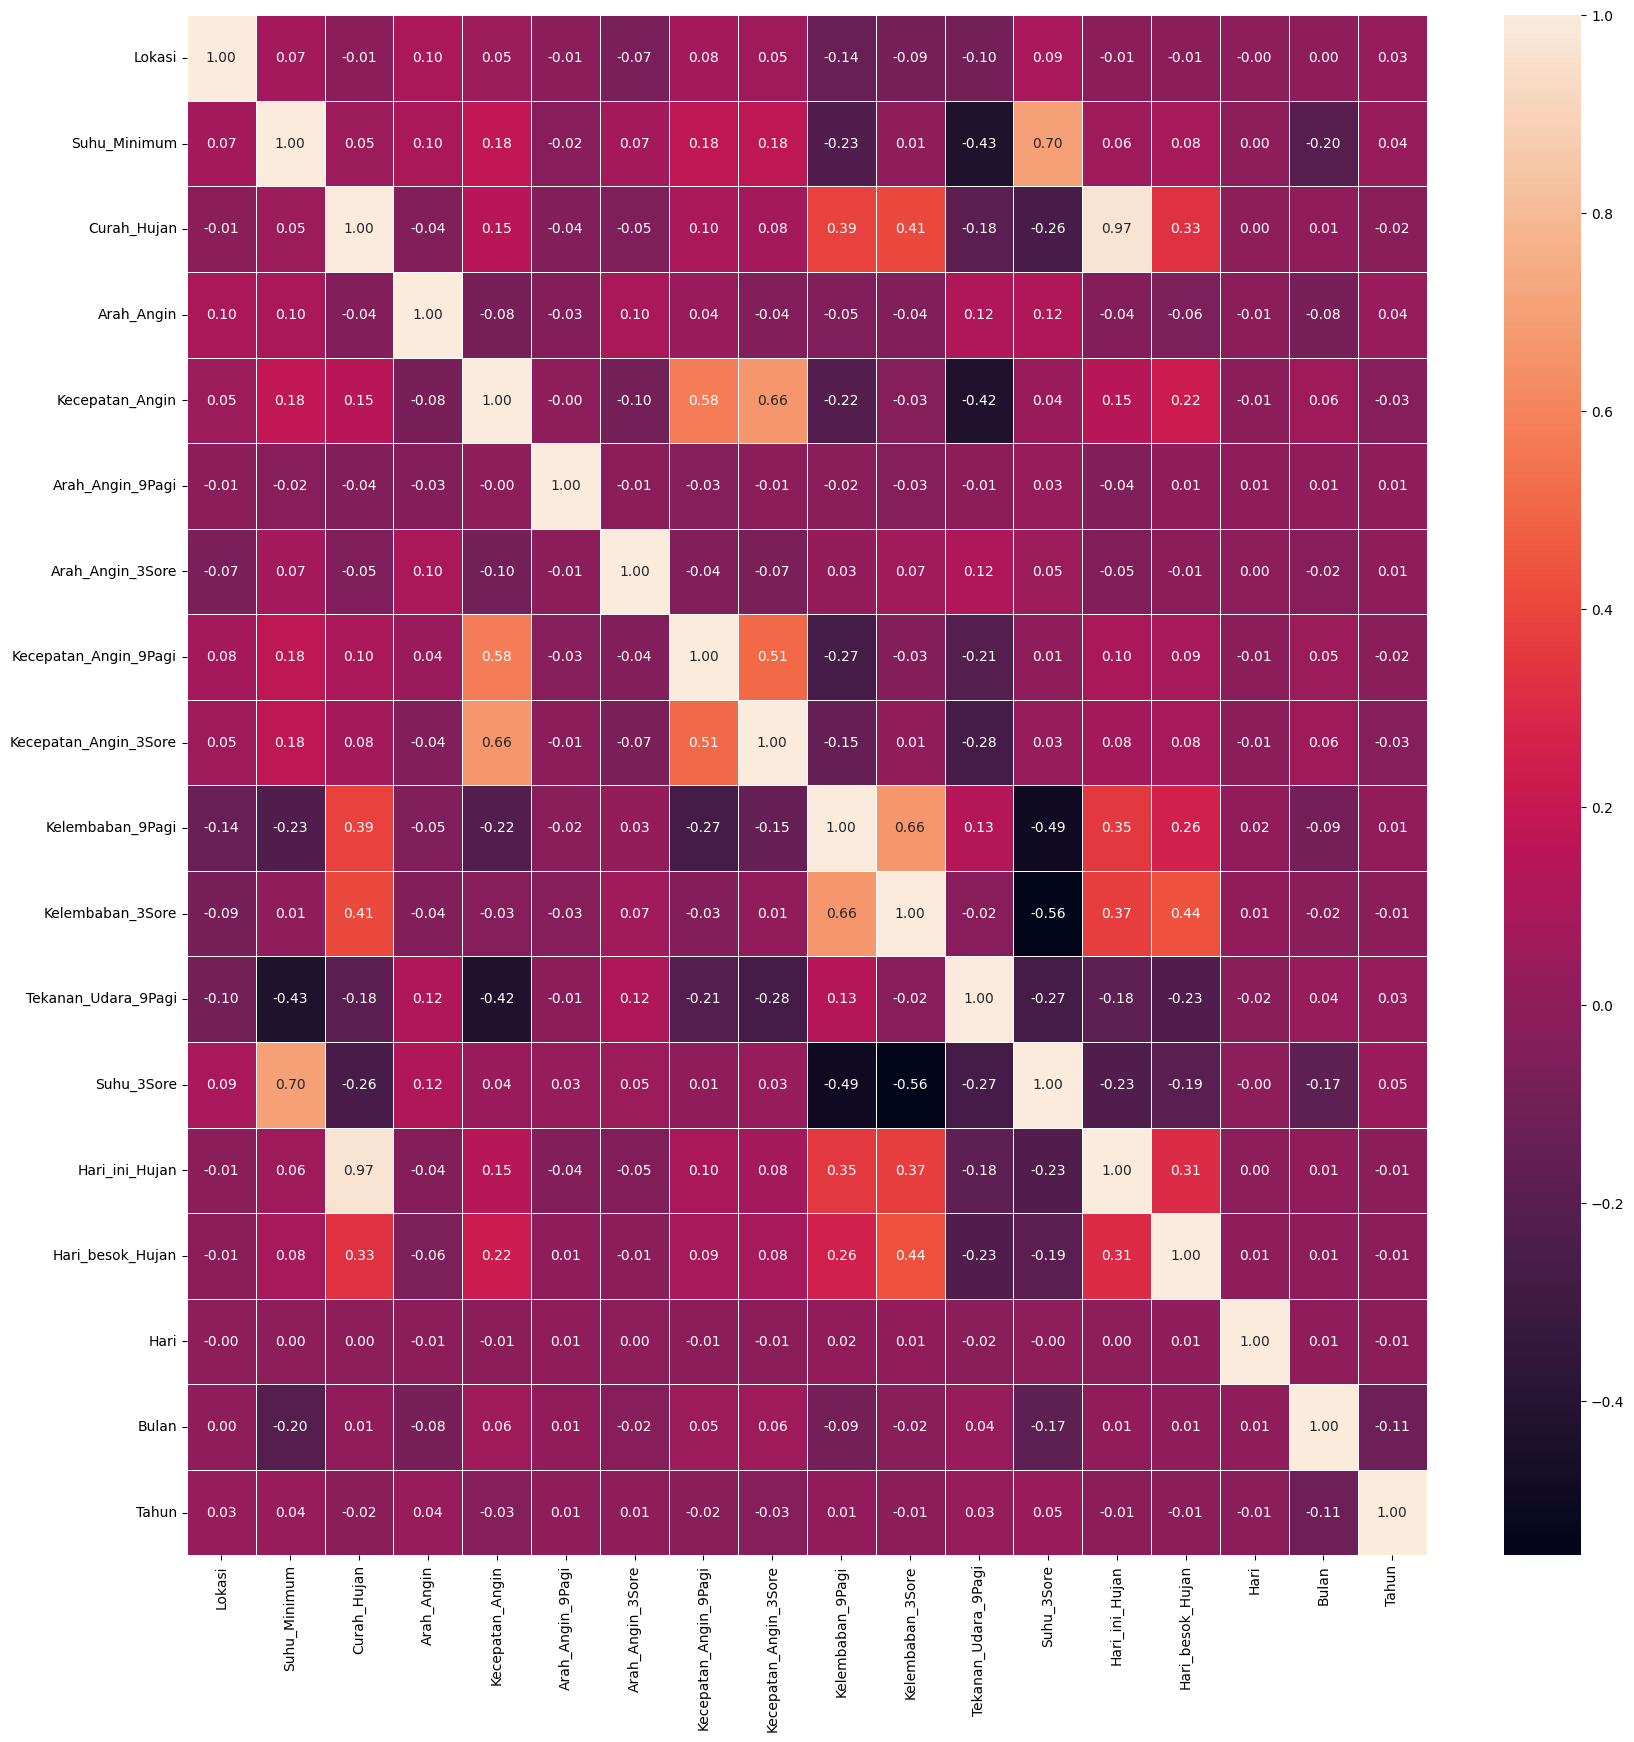

In [63]:
fig, ax = plt.subplots(figsize=(20,20))
cm = sns.heatmap(df4.corr(), linewidths = .5, annot=True, fmt='.2f')

Diperoleh:
- Atribut Lokasi, Arah_Angin, Arah_Angin_3Sore, Tekanan_Udara_9Pagi, Suhu_3Sore, dan Tahun berkorelasi negatif dengan atribut target (Hari_besok_Hujan)
- Atribut selain yang disebutkan di atas memiliki korelasi positif terhadap Hari_besok_Hujan.
- Atribut yang berkorelasi cukup tinggi dengan atribut Hari_besok_Hujan adalah Kelembaban_3Sore, Curah_Hujan, dan Hari_ini_Hujan

## Feature Selection

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [64]:
X = df4.drop(['Hari_besok_Hujan'], axis=1)
y = df4['Hari_besok_Hujan']
print(X.shape)
print(y.shape)

(142193, 17)
(142193,)


Melakukan feature selection menggunakan library *ExtraTreesRegressor* yang mengambil 10 atribut paling penting

In [65]:
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)

ExtraTreesRegressor()

In [66]:
etr_model.feature_importances_

array([0.04832261, 0.04752372, 0.0424395 , 0.04095123, 0.07179704,
       0.04189095, 0.04269201, 0.04276532, 0.04554288, 0.05352108,
       0.23197735, 0.06378669, 0.04715202, 0.04975736, 0.04502167,
       0.04276058, 0.04209799])

<Axes: >

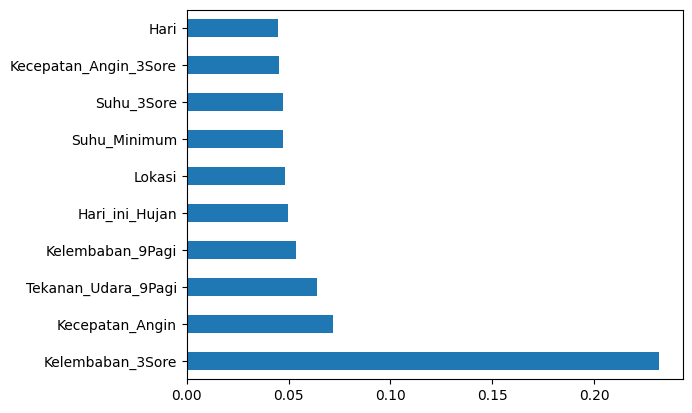

In [67]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

Diperoleh 10 atribut paling berpengaruh dalam model

In [68]:
feature_imp

Lokasi                   0.048323
Suhu_Minimum             0.047524
Curah_Hujan              0.042439
Arah_Angin               0.040951
Kecepatan_Angin          0.071797
Arah_Angin_9Pagi         0.041891
Arah_Angin_3Sore         0.042692
Kecepatan_Angin_9Pagi    0.042765
Kecepatan_Angin_3Sore    0.045543
Kelembaban_9Pagi         0.053521
Kelembaban_3Sore         0.231977
Tekanan_Udara_9Pagi      0.063787
Suhu_3Sore               0.047152
Hari_ini_Hujan           0.049757
Hari                     0.045022
Bulan                    0.042761
Tahun                    0.042098
dtype: float64

Selain itu juga melakukan feature selection menggunakan library SelectKBest dengan k=10

In [69]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k = 10)
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

              Feat_names      F_Scores
6       Kelembaban_3Sore  34087.248170
1            Curah_Hujan  16910.425006
9         Hari_ini_Hujan  14748.527720
5       Kelembaban_9Pagi   9978.737922
7    Tekanan_Udara_9Pagi   8135.749709
2        Kecepatan_Angin   7427.368528
8             Suhu_3Sore   5345.954176
3  Kecepatan_Angin_9Pagi   1123.192652
4  Kecepatan_Angin_3Sore   1007.230243
0           Suhu_Minimum   1003.298449


Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final pada variabel X yang akan dijadikan training.

Dalam hal ini dipilih5 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selection yang telah dilakukan, yaitu atribut lokasi, hari_ini_hujan, kelembaban_3sore, kecepatan_angin, dan tekanan_udara_9pagi.

In [70]:
X_fit = df4[['Lokasi','Hari_ini_Hujan','Kelembaban_3Sore','Kecepatan_Angin','Tekanan_Udara_9Pagi']]

In [71]:
X_fit.head()

,Lokasi,Hari_ini_Hujan,Kelembaban_3Sore,Kecepatan_Angin,Tekanan_Udara_9Pagi
0,0,0,22.0,44.0,1007.7
1,0,0,25.0,44.0,1010.6
2,0,0,30.0,46.0,1007.6
3,0,0,16.0,24.0,1017.6
4,0,0,33.0,41.0,1010.8


In [72]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Lokasi               142193 non-null  int64  
 1   Hari_ini_Hujan       142193 non-null  int64  
 2   Kelembaban_3Sore     142193 non-null  float64
 3   Kecepatan_Angin      142193 non-null  float64
 4   Tekanan_Udara_9Pagi  142193 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 6.5 MB


Melihat dimensi dari X_fit

In [73]:
X_fit.shape

(142193, 5)

Memiliki 142193 baris dan 5 atribut.

## Feature Scaling

In [74]:
input_variables = [i for i in X_fit.columns if i != 'Hari_besok_Hujan']

Melakukan scaling/standarisasi data menggunakan StandarScaler

In [75]:
scaler = StandardScaler()
X_fit[input_variables] = scaler.fit_transform(X_fit[input_variables])
X_fit.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13228\1112773166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_fit[input_variables] = scaler.fit_transform(X_fit[input_variables])


,Lokasi,Hari_ini_Hujan,Kelembaban_3Sore,Kecepatan_Angin,Tekanan_Udara_9Pagi
0,-1.690728,-0.532962,-1.436563,0.339851,-1.494602
1,-1.690728,-0.532962,-1.290451,0.339851,-1.059731
2,-1.690728,-0.532962,-1.046931,0.499321,-1.509597
3,-1.690728,-0.532962,-1.728788,-1.254853,-0.010041
4,-1.690728,-0.532962,-0.900818,0.100645,-1.029739


In [76]:
X_fit.describe()

,Lokasi,Hari_ini_Hujan,Kelembaban_3Sore,Kecepatan_Angin,Tekanan_Udara_9Pagi
count,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05,1.421930e+05
mean,-6.396199e-17,-1.207283e-16,-8.315058e-17,2.172709e-16,1.001325e-14
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.690728e+00,-5.329623e-01,-2.508053e+00,-2.690087e+00,-2.851700e+00
25%,-9.031400e-01,-5.329623e-01,-7.060020e-01,-6.967068e-01,-6.248592e-01
50%,-4.395293e-02,-5.329623e-01,2.455944e-02,-5.882526e-02,-1.004119e-02
75%,8.868331e-01,-5.329623e-01,6.577127e-01,4.993211e-01,6.197724e-01
max,1.746020e+00,1.876305e+00,2.362356e+00,2.692039e+00,2.846613e+00


## Model Defining

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

Membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fit, y, test_size=0.20, random_state=325)

### Logistic Regression

Metode pengujian pada training ini menggunakan metode regresi logistik.
Alasan penggunaan metode karena regresi logistik dapat dipakai untuk masalah klasifikasi biner. Model akan menghitung probabilitas data masing-masing kelas kemudian membuat keputusan akhir dengan mengambil probabilitas tertinggi.

In [79]:
logreg_model = LogisticRegression(penalty = 'l2', random_state = 5)

### SVM

Model kedua yakni model SVM. Model ini digunakan sebagai pembanding model regresi logistik. SVM dapat mengolah data berdimensi tinggi tanpa mengalami penurunan performa yang signifikan.

In [80]:
for kernel in ["linear", "poly", "rbf"]:
               accuracy = cross_val_score(SVC(kernel=kernel), X, y, cv=2, scoring="accuracy").mean()
               print("{}:{}".format(kernel, accuracy))

linear:0.8309059432579632
poly:0.8224244404831718
rbf:0.7951656027897003


In [81]:
svm_model = svm.SVC(kernel='linear')

## Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [82]:
logreg_model = logreg_model.fit(X_train, y_train)

In [83]:
svm_model = svm_model.fit(X_train, y_train)

## Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih.

### Logistic Regression

In [84]:
y_pred_logreg = logreg_model.predict(X_test)
print("Test score:", logreg_model.score(X_test, y_test))
print("Train score:", logreg_model.score(X_train, y_train))

Test score: 0.8366679559759486
Train score: 0.8360497213284808


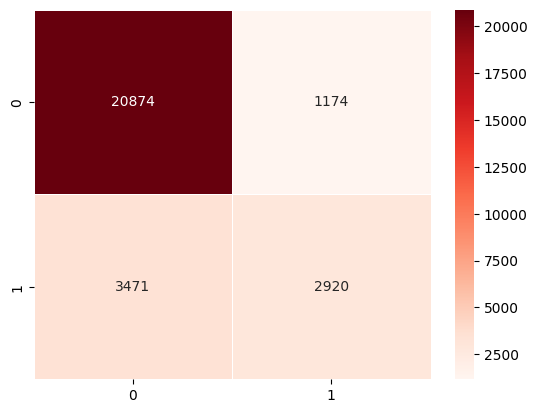

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22048
           1       0.71      0.46      0.56      6391

    accuracy                           0.84     28439
   macro avg       0.79      0.70      0.73     28439
weighted avg       0.83      0.84      0.82     28439



In [85]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred_logreg))

In [86]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_logreg))
print('Presisi :', precision_score(y_test,y_pred_logreg))
print('Recall :', recall_score(y_test,y_pred_logreg))
print('F1 Score :', f1_score(y_test,y_pred_logreg))

Ringkasan Evaluasi Model
Akurasi : 0.8366679559759486
Presisi : 0.7132388861748901
Recall : 0.4568925050852762
F1 Score : 0.5569861707200763


### SVM

In [87]:
y_pred_svm = svm_model.predict(X_test)

print("Test score:", svm_model.score(X_test, y_test))
print("Train score:", svm_model.score(X_train, y_train))

Test score: 0.8378986602904462
Train score: 0.8360233486294988


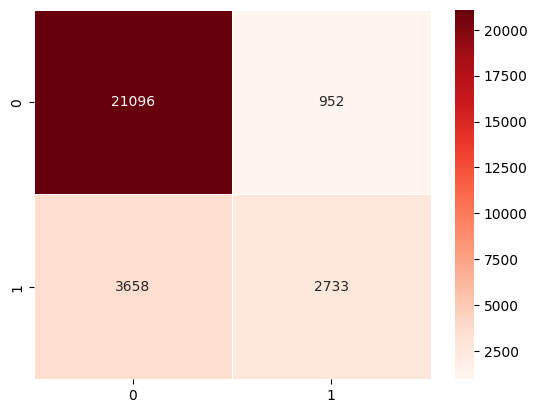

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22048
           1       0.74      0.43      0.54      6391

    accuracy                           0.84     28439
   macro avg       0.80      0.69      0.72     28439
weighted avg       0.83      0.84      0.82     28439



In [88]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.show()
print(classification_report(y_test, y_pred_svm))

In [89]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, y_pred_svm))
print('Presisi :', precision_score(y_test,y_pred_svm))
print('Recall :', recall_score(y_test,y_pred_svm))
print('F1 Score :', f1_score(y_test,y_pred_svm))

Ringkasan Evaluasi Model
Akurasi : 0.8378986602904462
Presisi : 0.7416553595658073
Recall : 0.42763260835549993
F1 Score : 0.5424771734815402


Diperoleh bahwa:
- Model regresi memiliki nilai evaluasi model Recall dan F1 Score yang lebih baik dibandingkan model svm, tetapi akurasi dan presisinya lebih rendah.
- Nilai evaluasi dari kedua model tidak berbeda jauh satu sama lain, kedua model cukup baik untuk melakukan prediksi hujan di Australia.

## Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

In [90]:
X_new = {'Lokasi':[0,1,15,34,48], 'Hari_ini_Hujan':[0,1,0,1,1], 'Kelembaban_3Sore':[11,1.25,2.3,20.4,4.52], 'Kecepatan_Angin':[12.45,20.5,11.4,45.3,30.2], 'Tekanan_Udara_9Pagi':[10.85,4.5,12,15.5,20.3]}
X_new = pd.DataFrame(X_new)
X_new.head()

,Lokasi,Hari_ini_Hujan,Kelembaban_3Sore,Kecepatan_Angin,Tekanan_Udara_9Pagi
0,0,0,11.00,12.45,10.85
1,1,1,1.25,20.50,4.50
2,15,0,2.30,11.40,12.00
3,34,1,20.40,45.30,15.50
4,48,1,4.52,30.20,20.30


Melakukan standarisasi pada data baru

In [91]:
scal = StandardScaler()
X_new = scal.fit_transform(X_new)

In [92]:
list(X_new)

[array([-1.04314364, -1.22474487,  0.43675775, -0.91271299, -0.34038959]),
 array([-0.98992202,  0.81649658, -0.93426222, -0.2749231 , -1.55470078]),
 array([-0.24481943, -1.22474487, -0.78661392, -0.99590298, -0.12047497]),
 array([0.76639125, 0.81649658, 1.75856161, 1.68994515, 0.54883041]),
 array([ 1.51149384,  0.81649658, -0.47444322,  0.49359392,  1.46673493])]

Melakukan prediksi pada data baru

In [93]:
y_pred1 = logreg_model.predict(X_new)
y_pred2 = svm_model.predict(X_new)
print('Prediksi Hujan: ')
print(y_pred1)
print(y_pred2)

Prediksi Hujan: 
[0 0 0 1 0]
[0 0 0 1 0]


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Conclusions

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:
- Terdapat 22 atribut yang diasumsikan memengaruhi Hari besok Hujan. Setelah dilakukan analisis, diambil 5 atribut/faktor yang paling berpengaruh dalam model.
- Faktor-faktor yang berpengaruh signifikan terhadap terjadi Hari besok Hujan yaitu lokasi, hari ini hujan, kelembaban 3 sore, kecepatan angin, dan tekanan udara 9 pagi.
- Model regresi logistik mempunyai akurasi sebesar Akurasi 0.836, Presisi sebesar 0.713, Recall sebesar 0.457, dan F1 Score sebesar 0.557.
- Model SVM mempunyai akurasi sebesar Akurasi 0.838, Presisi sebesar 0.742, Recall sebesar 0.427, dan F1 Score sebesar 0.542.
- Karena pada target tidak seimbang, maka evaluasi model yang digunakan adalah F1 Score dan model yang dipilih untuk deployment adalah regresi logistik.